# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Deepak Singh Bisht

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [385]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from tqdm import tqdm

# import warnings
# warnings.fiterwarnings("ignore")

### Dataset Loading

In [386]:
# Load Dataset
df= pd.read_csv("/kaggle/input/credit-card-defaulter-prediction/Credit Card Defaulter Prediction.csv").drop(columns= ["ID"])

### Dataset First View

In [387]:
# Dataset First Look
df.head()

LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0      20000   F  University  Married   24      2      2     -1     -1     -2   
1     120000   F  University   Single   26     -1      2      0      0      0   
2      90000   F  University   Single   34      0      0      0      0      0   
3      50000   F  University  Married   37      0      0      0      0      0   
4      50000   M  University  Married   57     -1      0     -1      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default   
0         0         0         0         Y  
1      1000         0      2000         Y  
2      1000      1000      5000         N  
3      1100      1069      1000         N  
4      9000       689       679         N  

[5 rows x 24 columns]

### Dataset Rows & Columns count

In [388]:
# Dataset Rows & Columns count
df.shape

(30000, 24)

### Dataset Information

In [389]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

#### Duplicate Values

In [390]:
# Dataset Duplicate Value Count
df.duplicated().sum()

35

#### Missing Values/Null Values

In [391]:
# Missing Values/Null Values Count
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

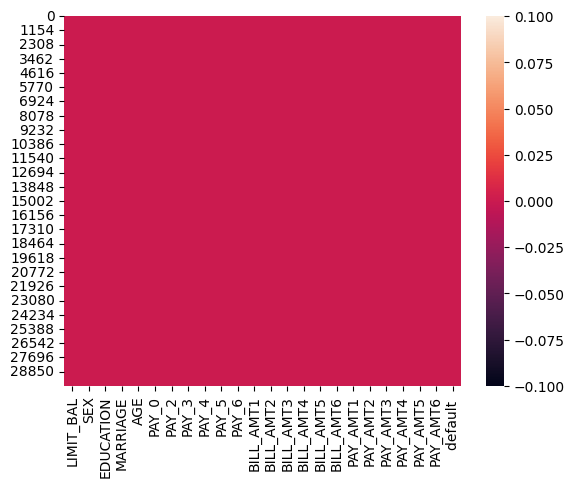

In [392]:
# Visualizing the missing values
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

The dataset has 24 features, including the target variable with 30000 entries, with 35 duplicate values.

## ***2. Understanding Your Variables***

In [393]:
# Dataset Columns
df.columns= df.columns.str.strip().str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [394]:
# Dataset Describe
df.describe(include= "all")

limit_bal    sex   education marriage           age  \
count     30000.000000  30000       30000    30000  30000.000000   
unique             NaN      2           6        4           NaN   
top                NaN      F  University   Single           NaN   
freq               NaN  18112       14030    15964           NaN   
mean     167484.322667    NaN         NaN      NaN     35.485500   
std      129747.661567    NaN         NaN      NaN      9.217904   
min       10000.000000    NaN         NaN      NaN     21.000000   
25%       50000.000000    NaN         NaN      NaN     28.000000   
50%      140000.000000    NaN         NaN      NaN     34.000000   
75%      240000.000000    NaN         NaN      NaN     41.000000   
max     1000000.000000    NaN         NaN      NaN     79.000000   

               pay_0         pay_2         pay_3         pay_4         pay_5  \
count   30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std         1.123802      1.197186      1.196868      1.169139      1.133187   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max         8.000000      8.000000      8.000000      8.000000      8.000000   

        ...      bill_amt4      bill_amt5      bill_amt6       pay_amt1  \
count   ...   30000.000000   30000.000000   30000.000000   30000.000000   
unique  ...            NaN            NaN            NaN            NaN   
top     ...            NaN            NaN            NaN            NaN   
freq    ...            NaN            NaN            NaN            NaN   
mean    ...   43262.948967   40311.400967   38871.760400    5663.580500   
std     ...   64332.856134   60797.155770   59554.107537   16563.280354   
min     ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%     ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%     ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%     ...   54506.000000   50190.500000   49198.250000    5006.000000   
max     ...  891586.000000  927171.000000  961664.000000  873552.000000   

            pay_amt2      pay_amt3       pay_amt4       pay_amt5  \
count   3.000000e+04   30000.00000   30000.000000   30000.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean    5.921163e+03    5225.68150    4826.076867    4799.387633   
std     2.304087e+04   17606.96147   15666.159744   15278.305679   
min     0.000000e+00       0.00000       0.000000       0.000000   
25%     8.330000e+02     390.00000     296.000000     252.500000   
50%     2.009000e+03    1800.00000    1500.000000    1500.000000   
75%     5.000000e+03    4505.00000    4013.250000    4031.500000   
max     1.684259e+06  896040.00000  621000.000000  426529.000000   

             pay_amt6  default  
count    30000.000000    30000  
unique            NaN        2  
top               NaN        N  
freq              NaN    23364  
mean      5215.502567      NaN  
std      17777.465775      NaN  
min          0.000000      NaN  
25%        117.750000      NaN  
50%       1500.000000      NaN  
75%       4000.000000      NaN  
max     528666.000000      NaN  

[11 rows x 24 columns]

### Variables Description 

Answer Here

In [395]:
#making a copy of df for later use in model building
df_model= df.copy()

### Check Unique Values for each variable.

In [396]:
# Check Unique Values for each variable.
for feature in df.columns:
    print(f"Number of Unique Values in {feature}: {df[feature].nunique()}")
    print(df[feature].value_counts())
    print("---------------------------------")

Number of Unique Values in limit_bal: 81
limit_bal
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64
---------------------------------
Number of Unique Values in sex: 2
sex
F    18112
M    11888
Name: count, dtype: int64
---------------------------------
Number of Unique Values in education: 6
education
University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: count, dtype: int64
---------------------------------
Number of Unique Values in marriage: 4
marriage
Single     15964
Married    13659
Other        323
0             54
Name: count, dtype: int64
---------------------------------
Number of Unique Values in age: 56
age
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [397]:
df.dtypes

limit_bal     int64
sex          object
education    object
marriage     object
age           int64
pay_0         int64
pay_2         int64
pay_3         int64
pay_4         int64
pay_5         int64
pay_6         int64
bill_amt1     int64
bill_amt2     int64
bill_amt3     int64
bill_amt4     int64
bill_amt5     int64
bill_amt6     int64
pay_amt1      int64
pay_amt2      int64
pay_amt3      int64
pay_amt4      int64
pay_amt5      int64
pay_amt6      int64
default      object
dtype: object

In [398]:
# Write your code to make your dataset analysis ready.
df= df.astype({
            "sex": "category",
            "education": "category",
            "marriage": "category",
            "pay_0": "category",
            "pay_2": "category",
            "pay_3": "category",
            "pay_4": "category",
            "pay_5": "category",
            "pay_6": "category",
            "default": "category"
        })

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [399]:
numerical_cols= list(df.select_dtypes(np.number).columns)

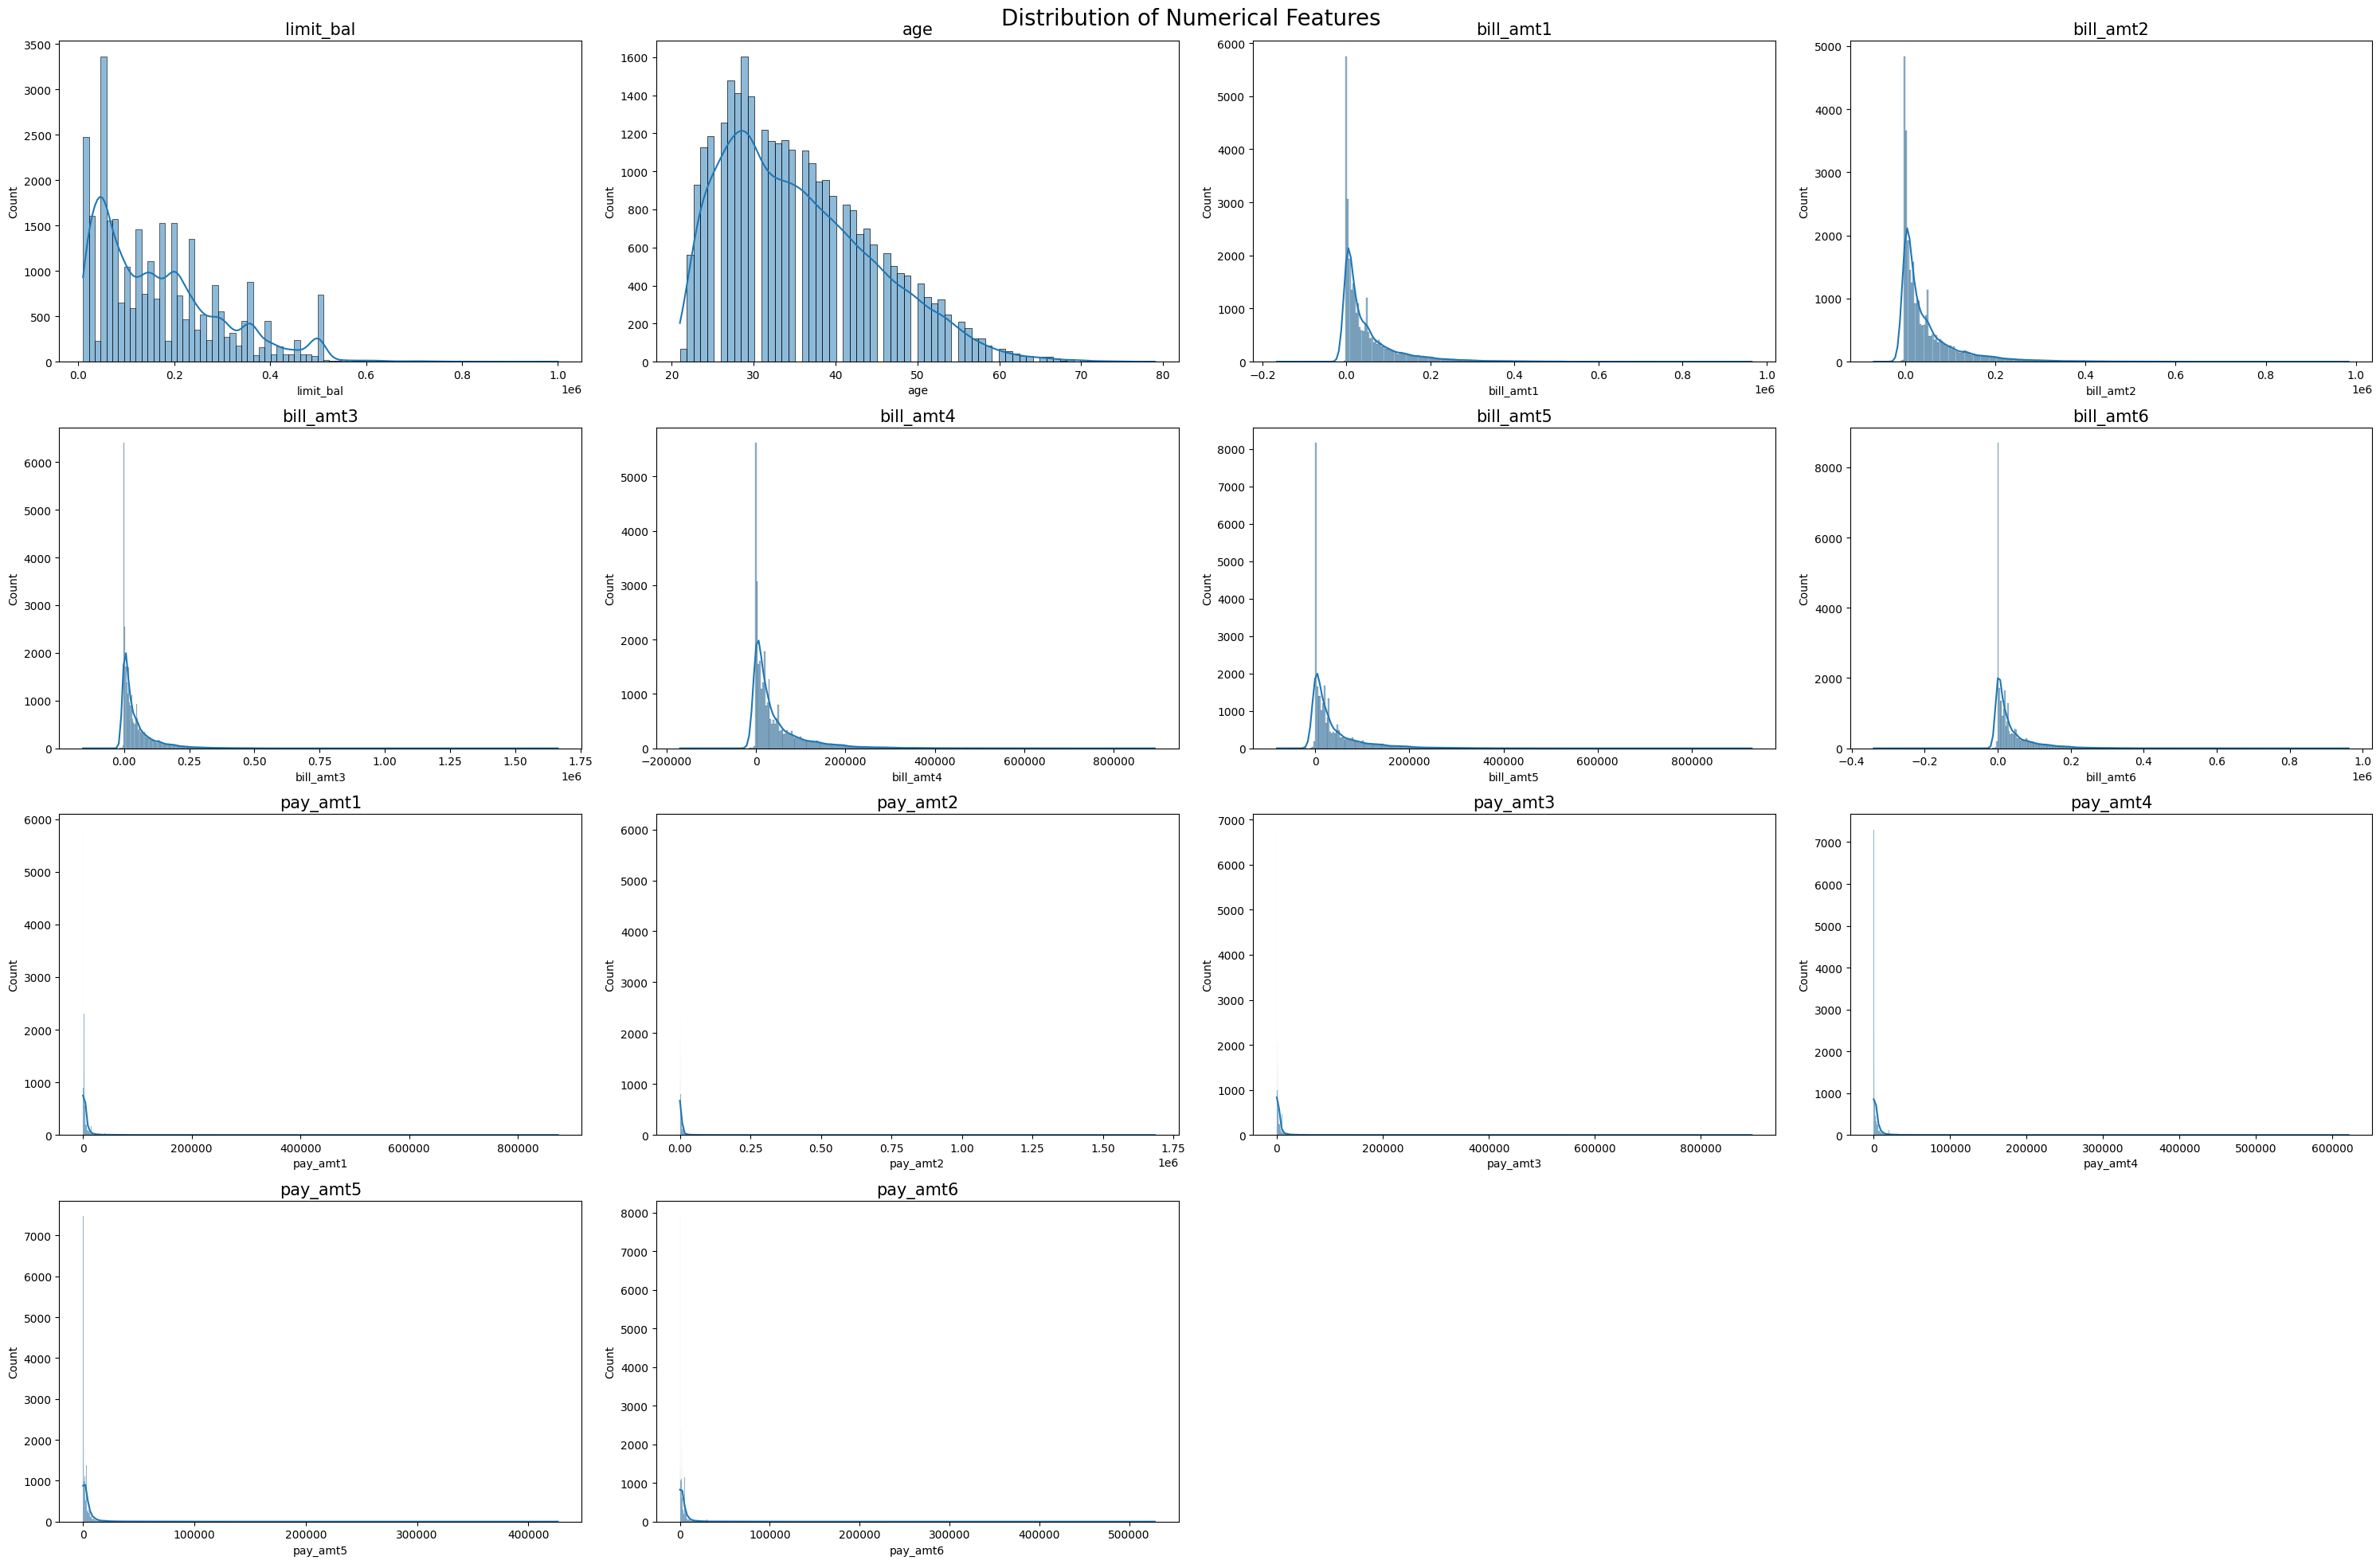

In [400]:
# Chart - 1 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.histplot(data= df, x= col, kde= True, ax= axes[i])
    axes[i].set_title(col, fontsize= 15)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

    
plt.suptitle("Distribution of Numerical Features", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [401]:
from scipy.stats import probplot

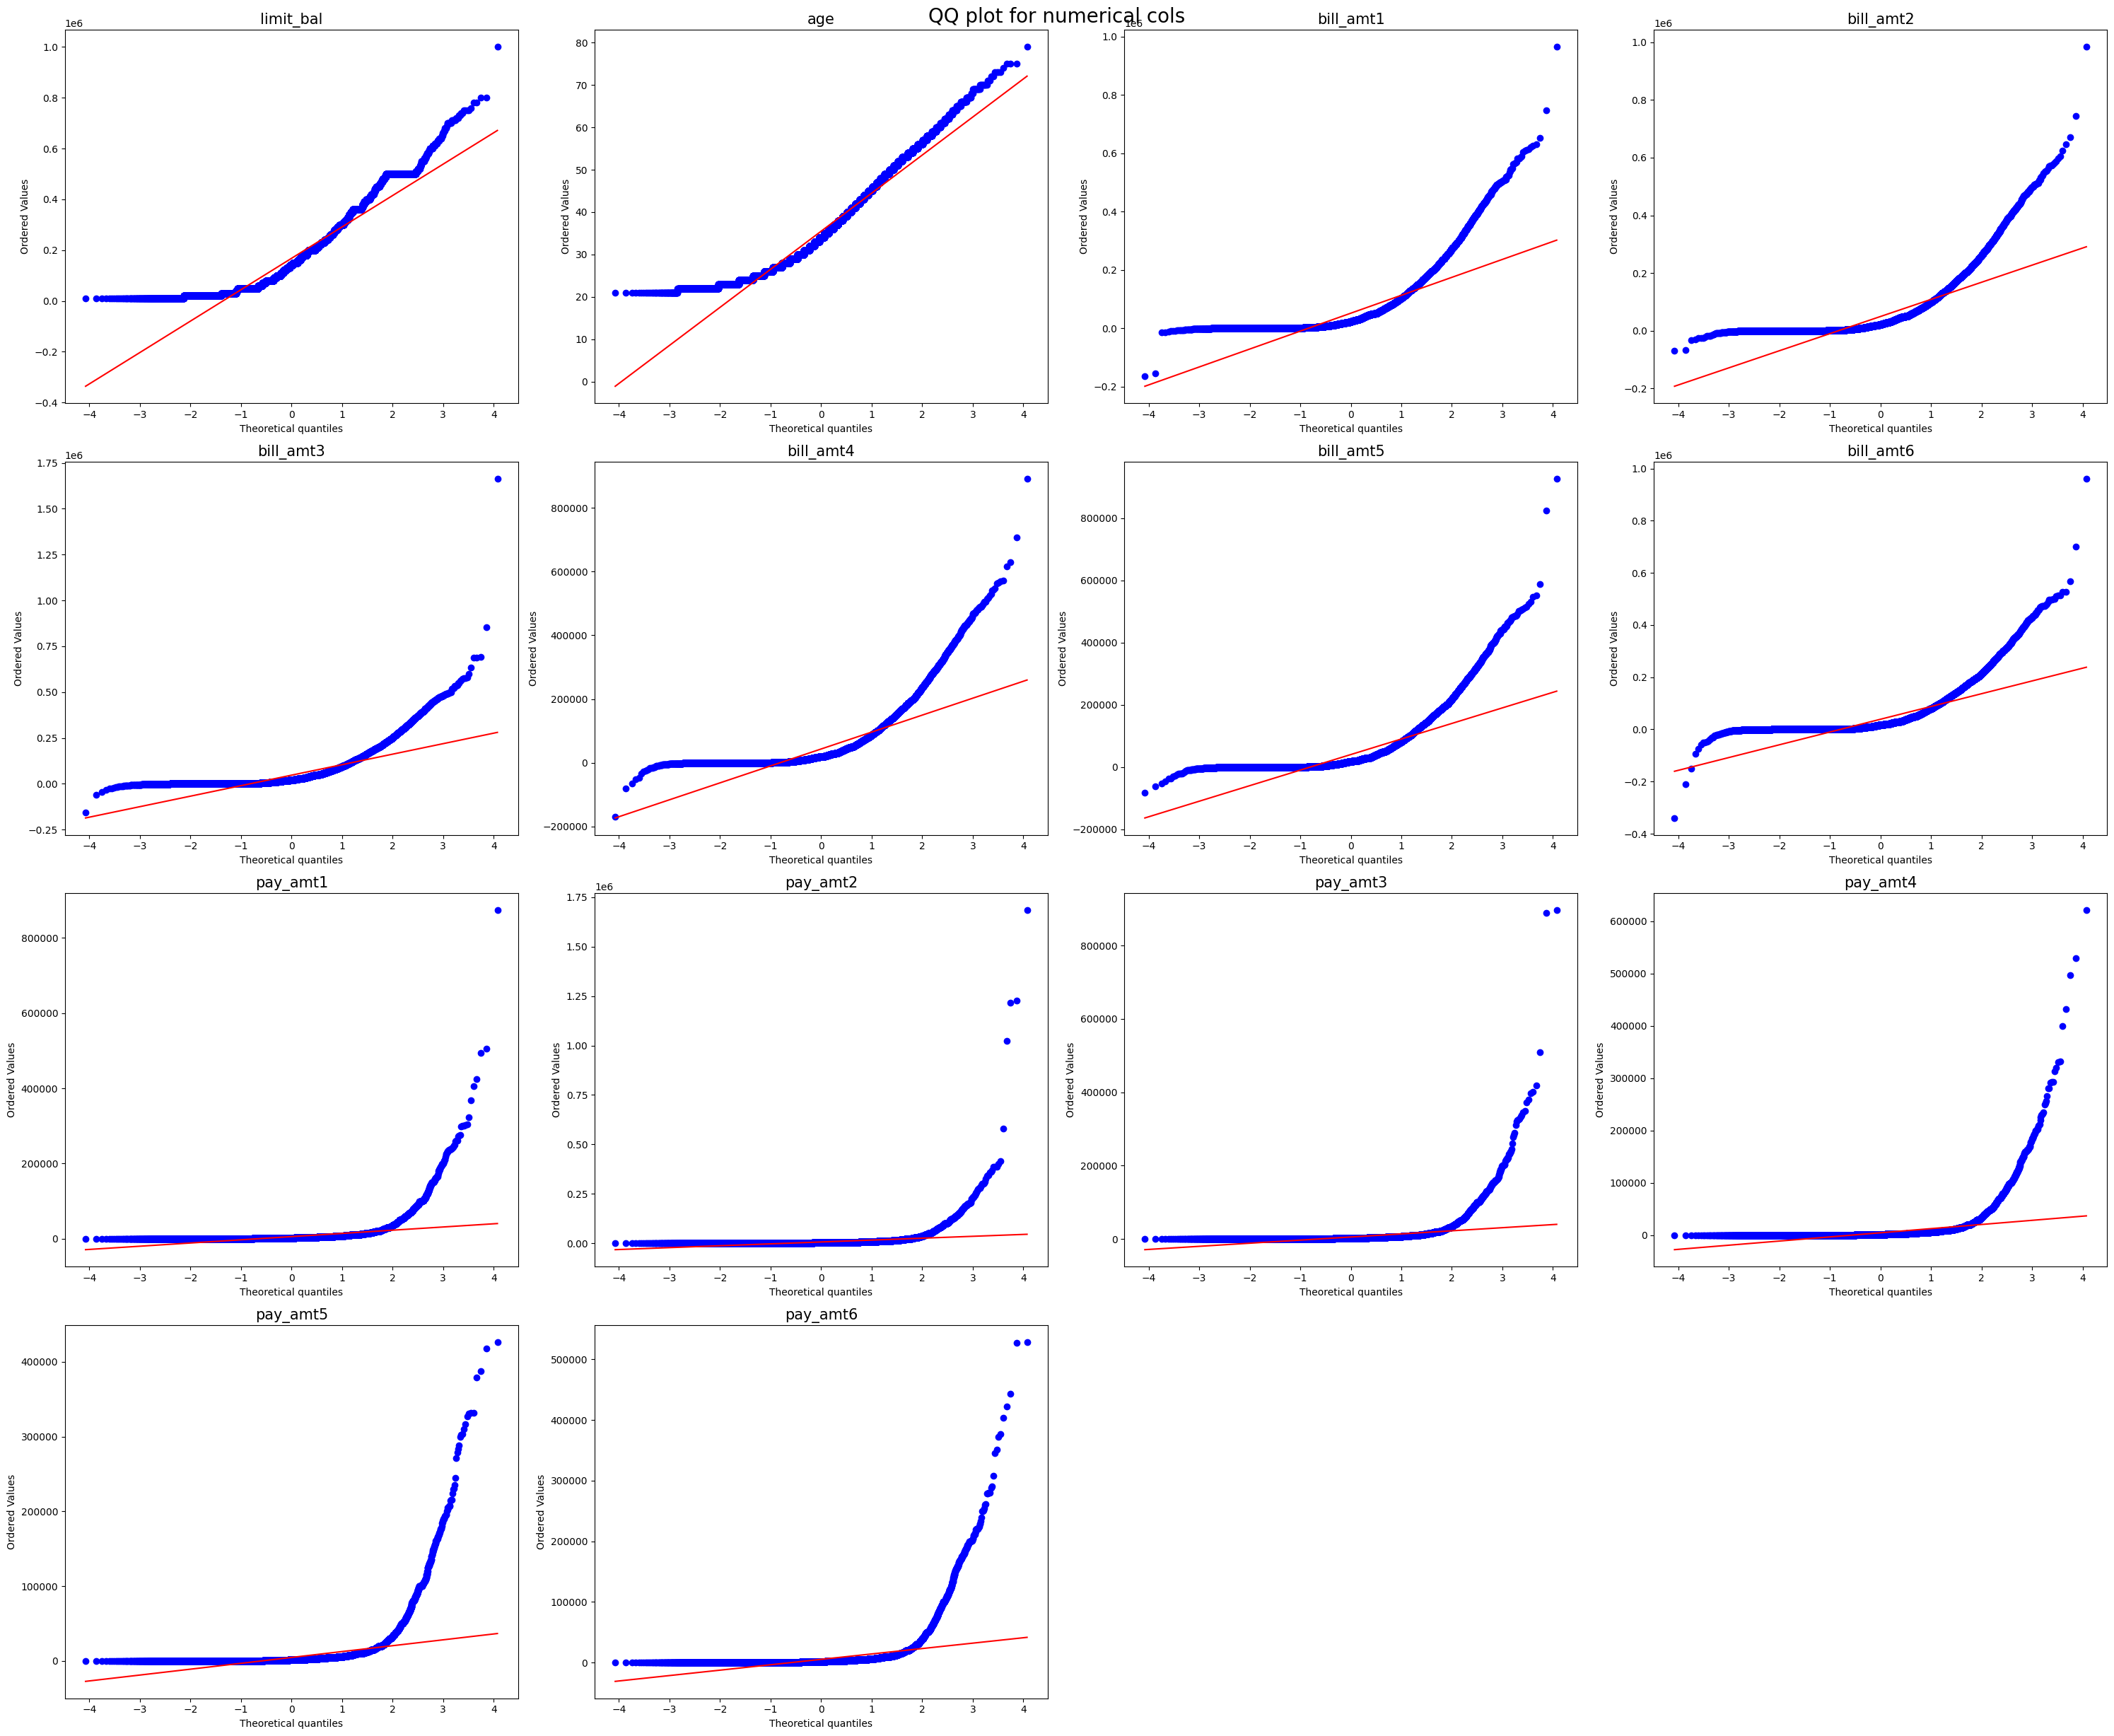

In [402]:
# Chart - 2 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 25))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    probplot(x= df[col], plot= axes[i])
#     probplot[0].set_markerfacecolor('#1f77b4')
    axes[i].set_title(col, fontsize= 15)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])
    
plt.suptitle("QQ plot for numerical cols", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

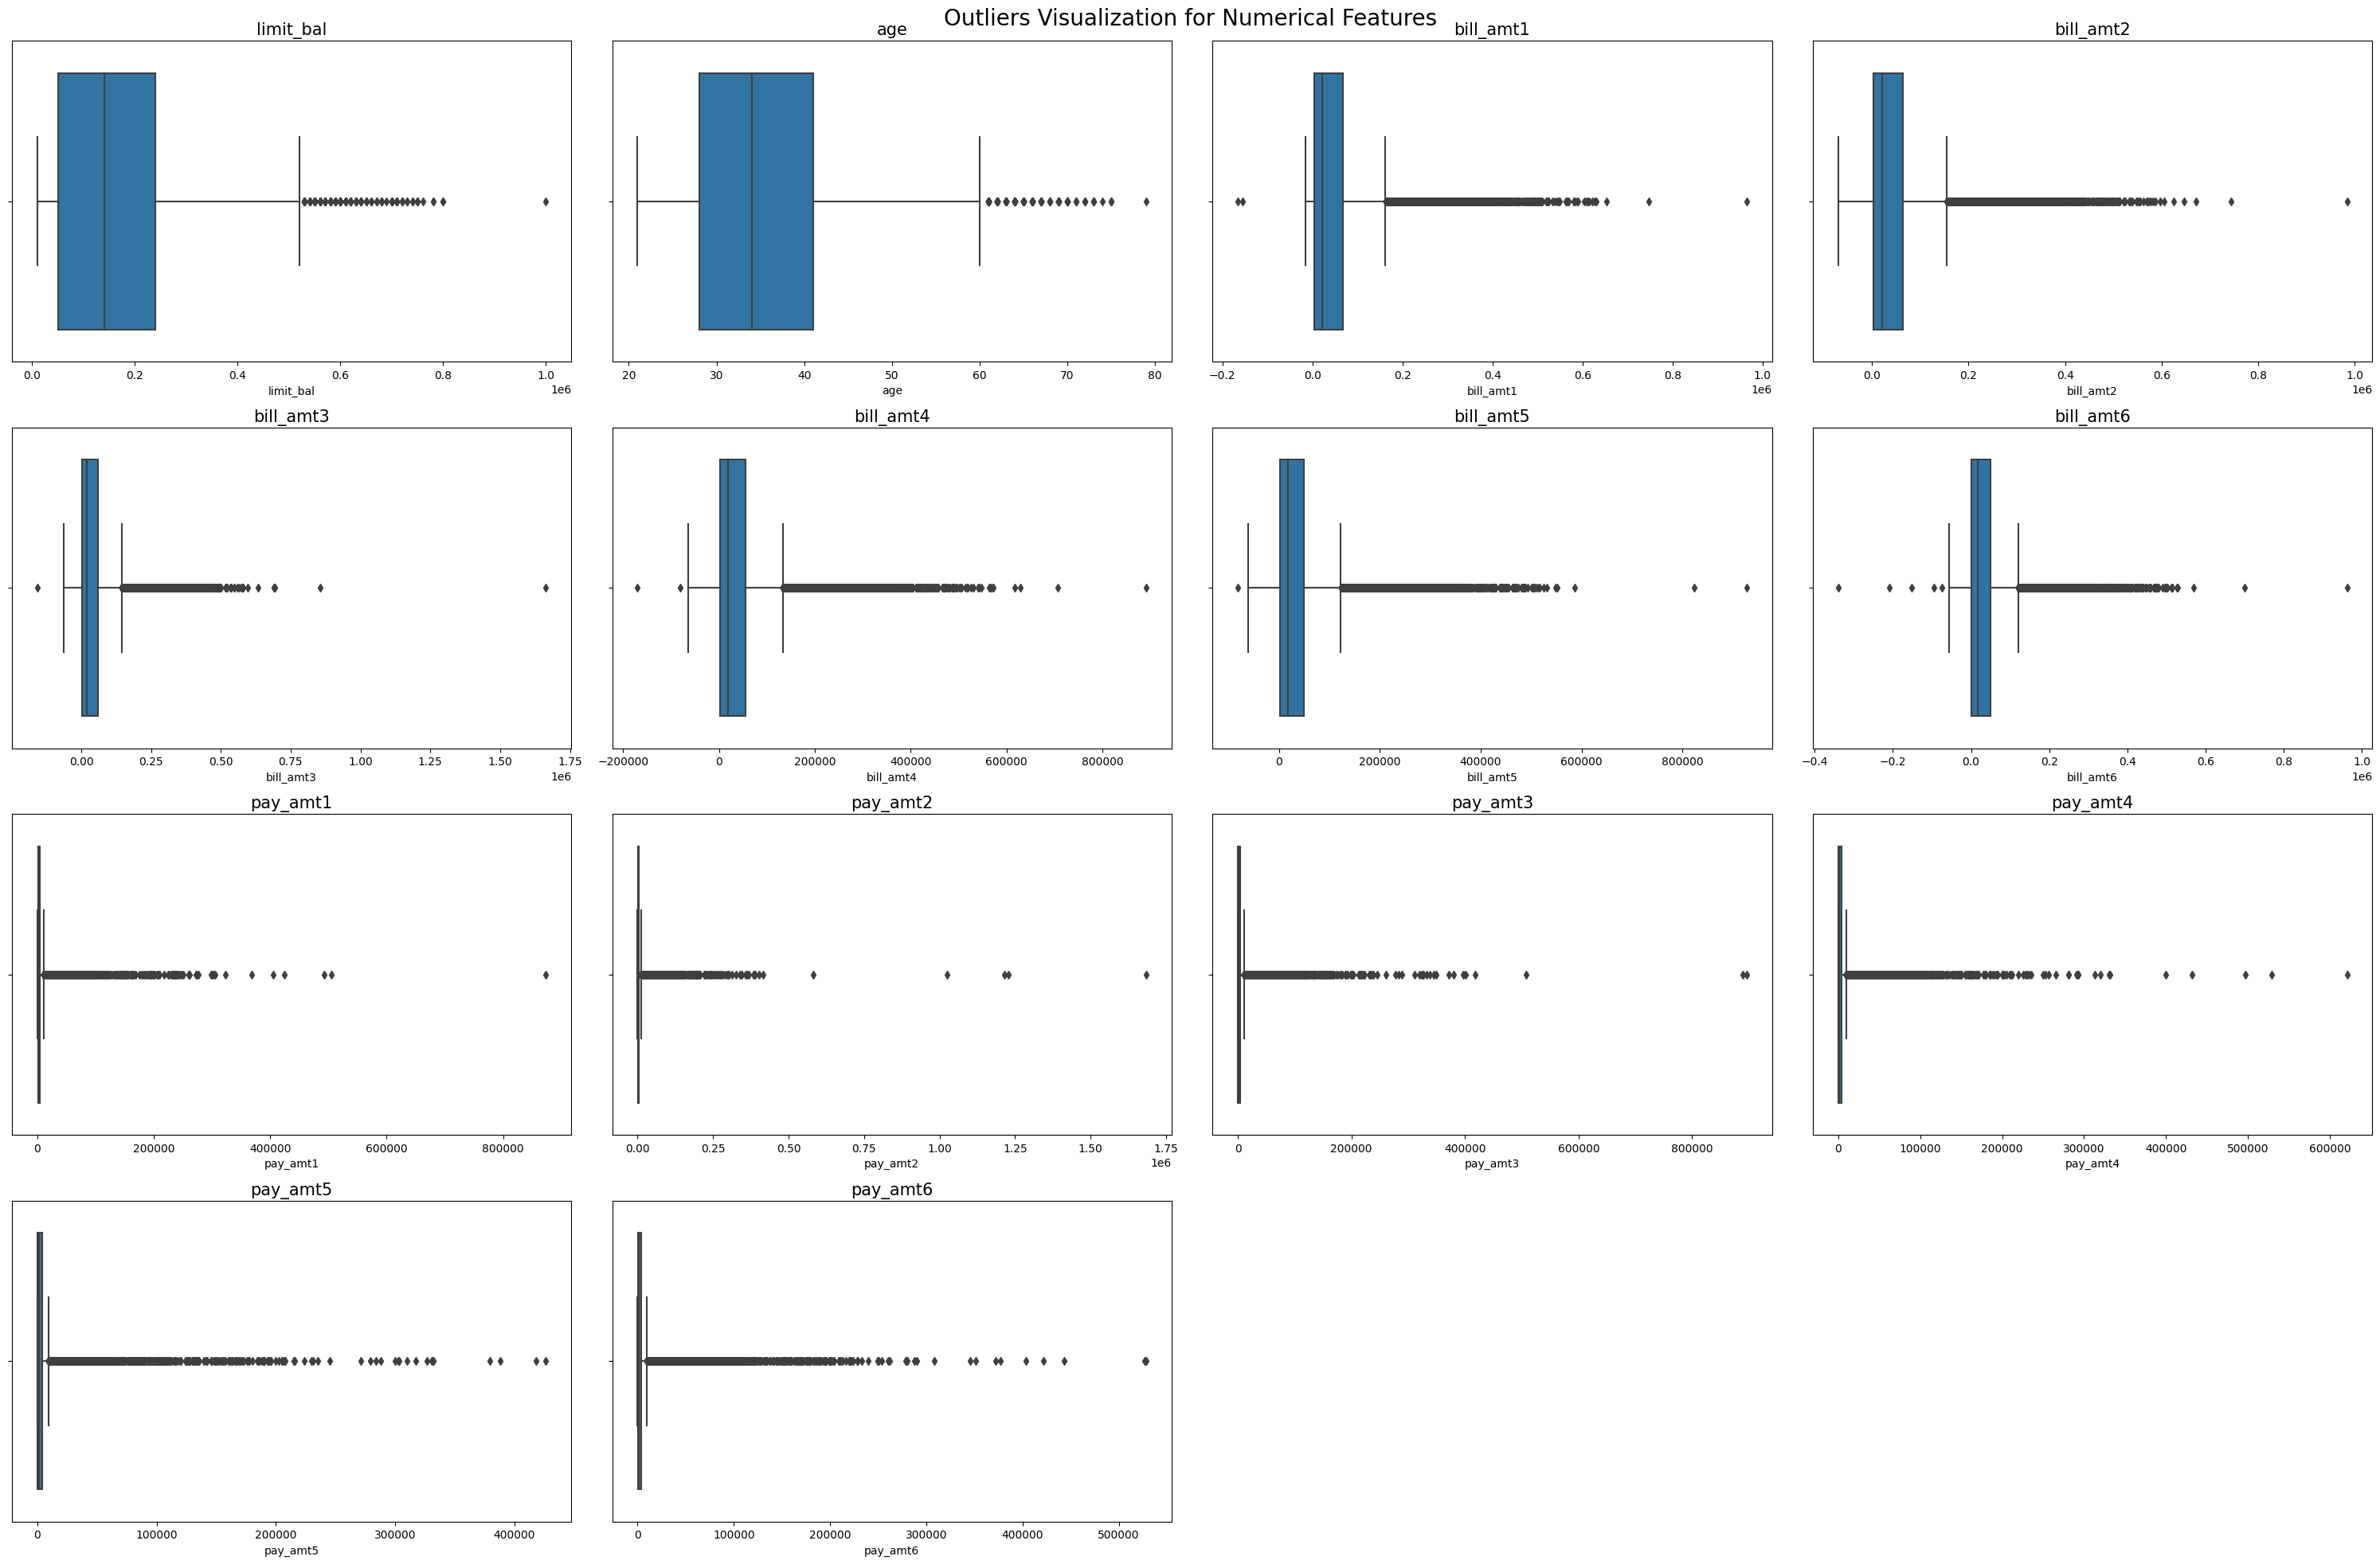

In [403]:
# Chart - 3 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(col, fontsize= 15)

for i in range(len(numerical_cols), 16): 
    fig.delaxes(axes[i])

plt.suptitle("Outliers Visualization for Numerical Features", fontsize= 20)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [404]:
categorical_cols= list(df.select_dtypes("category").columns)

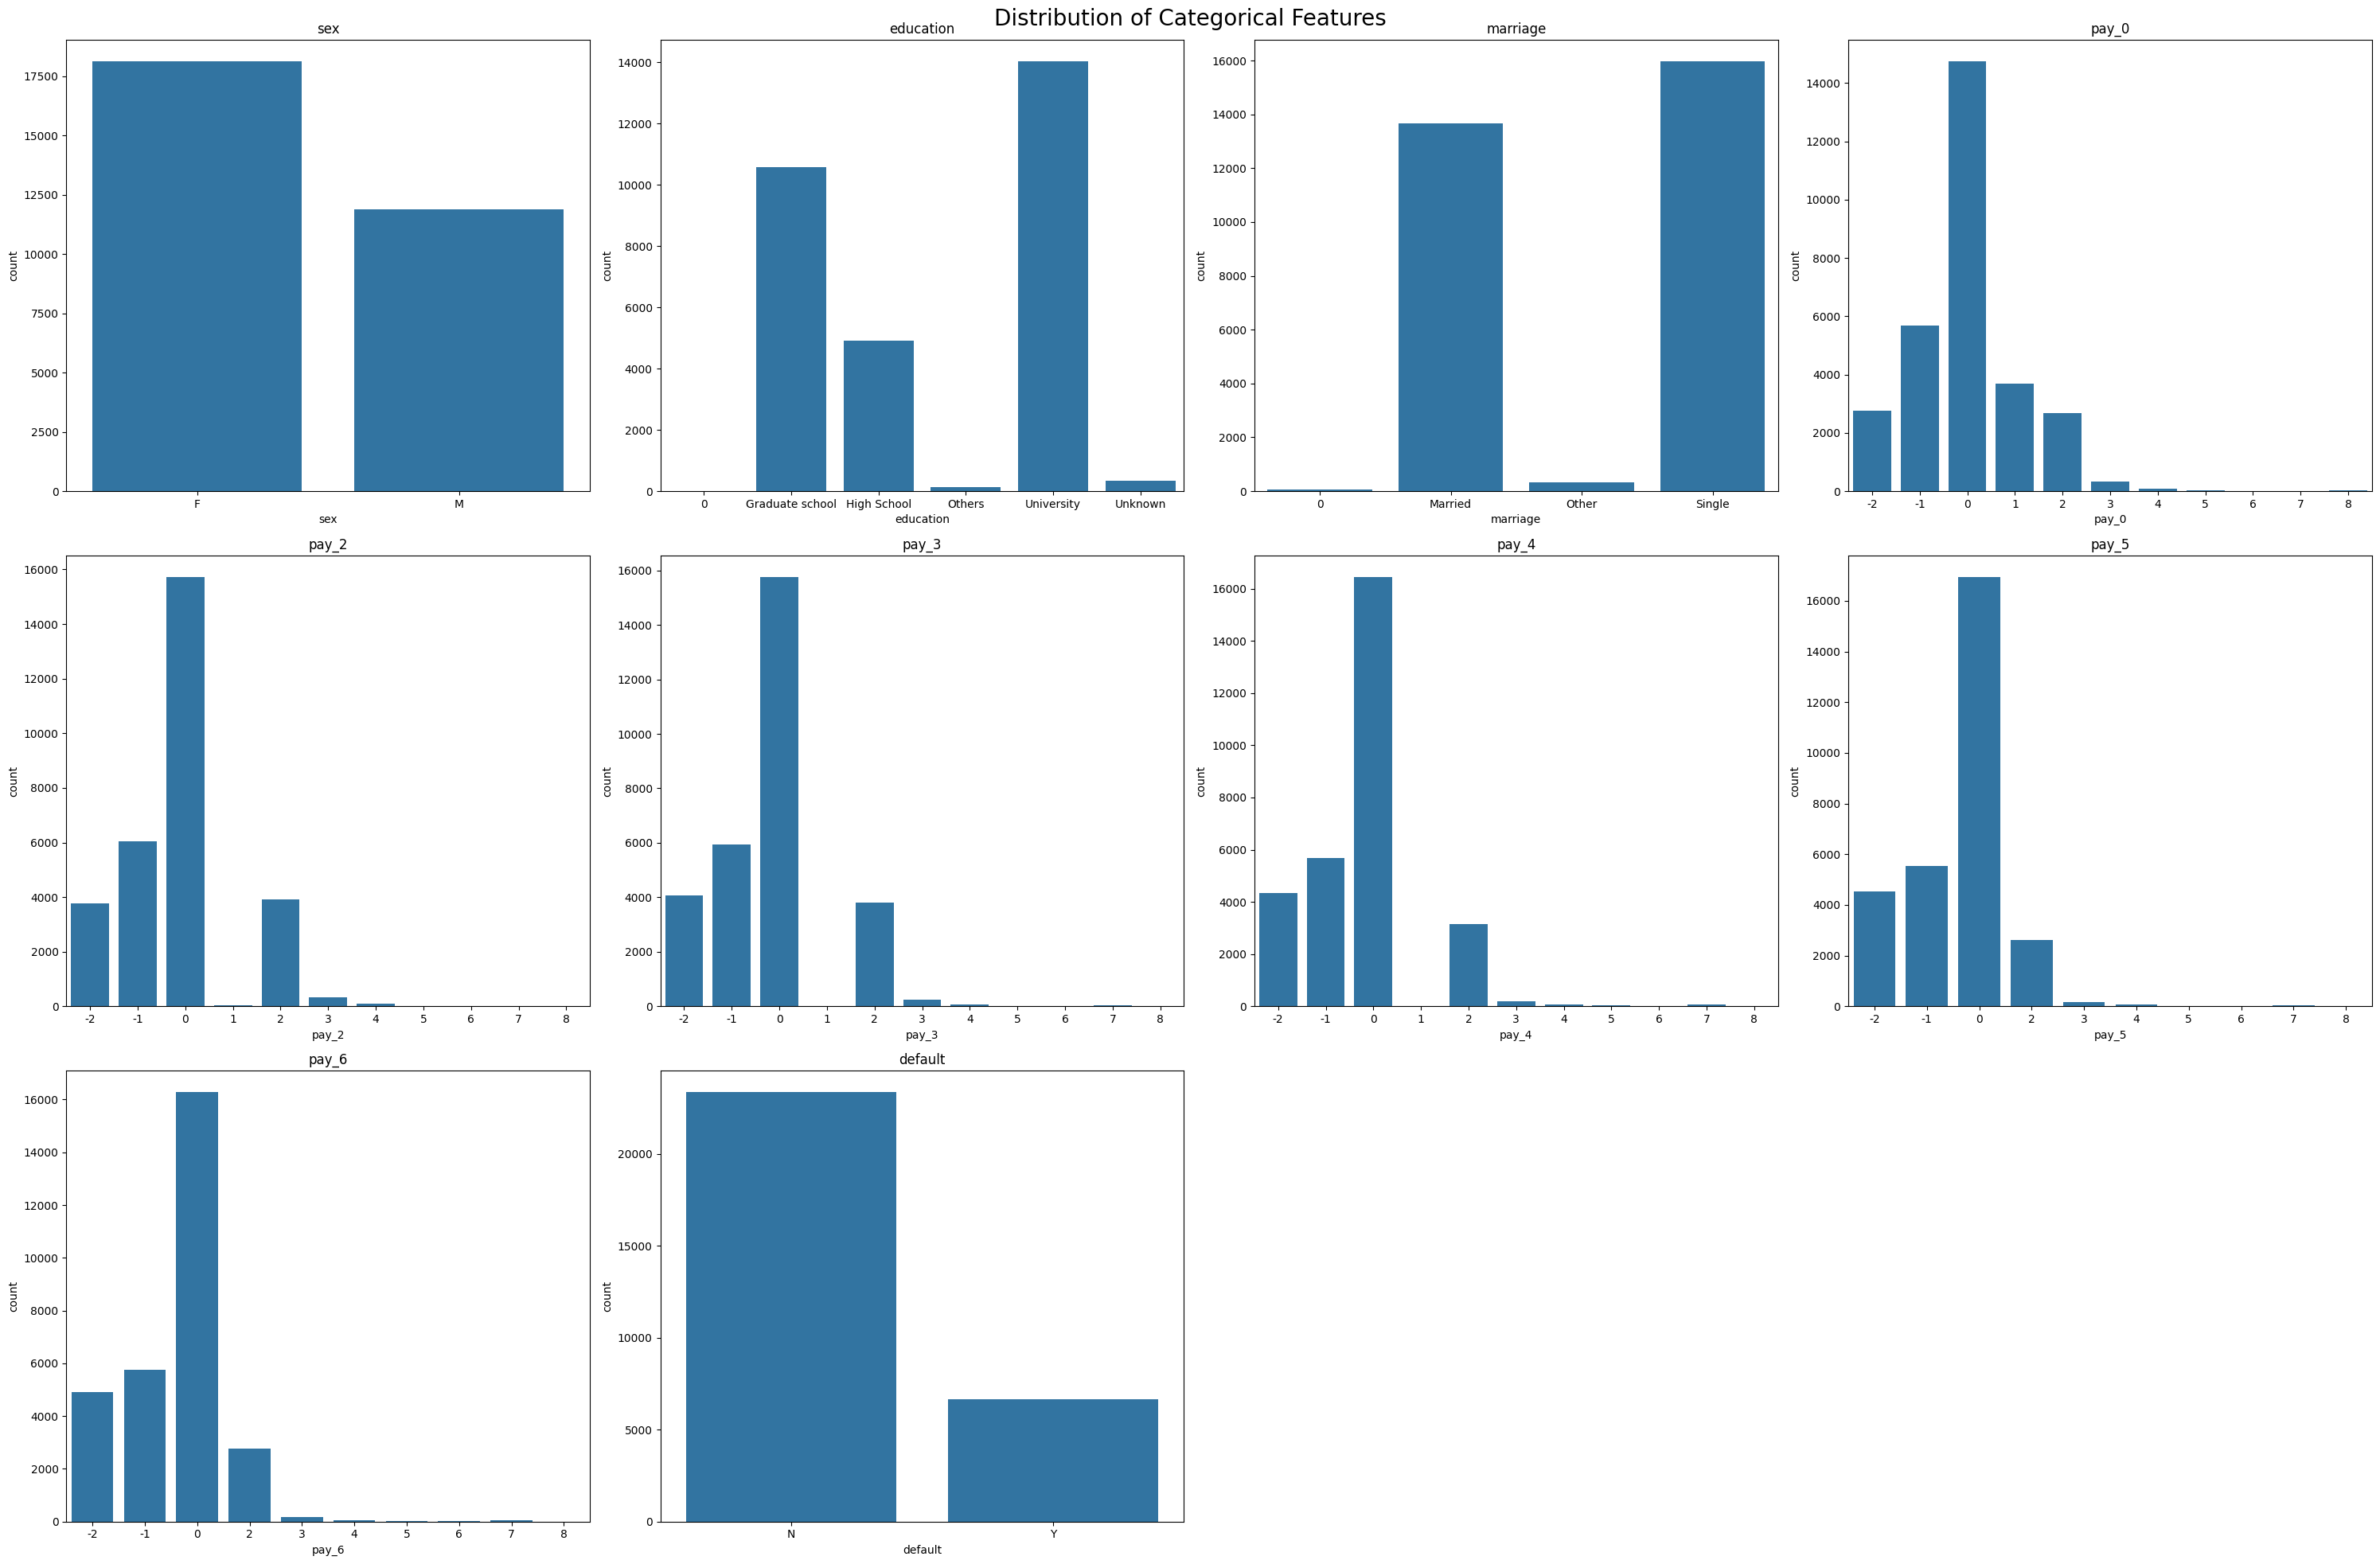

In [405]:
# Chart - 4 visualization code
fig, axes= plt.subplots(3, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data= df, x= col, color= "#1f77b4", ax= axes[i])
    axes[i].set_title(col)

for i in range(len(categorical_cols), 12):
    fig.delaxes(axes[i])

plt.suptitle("Distribution of Categorical Features", fontsize= 20)
    
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [406]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

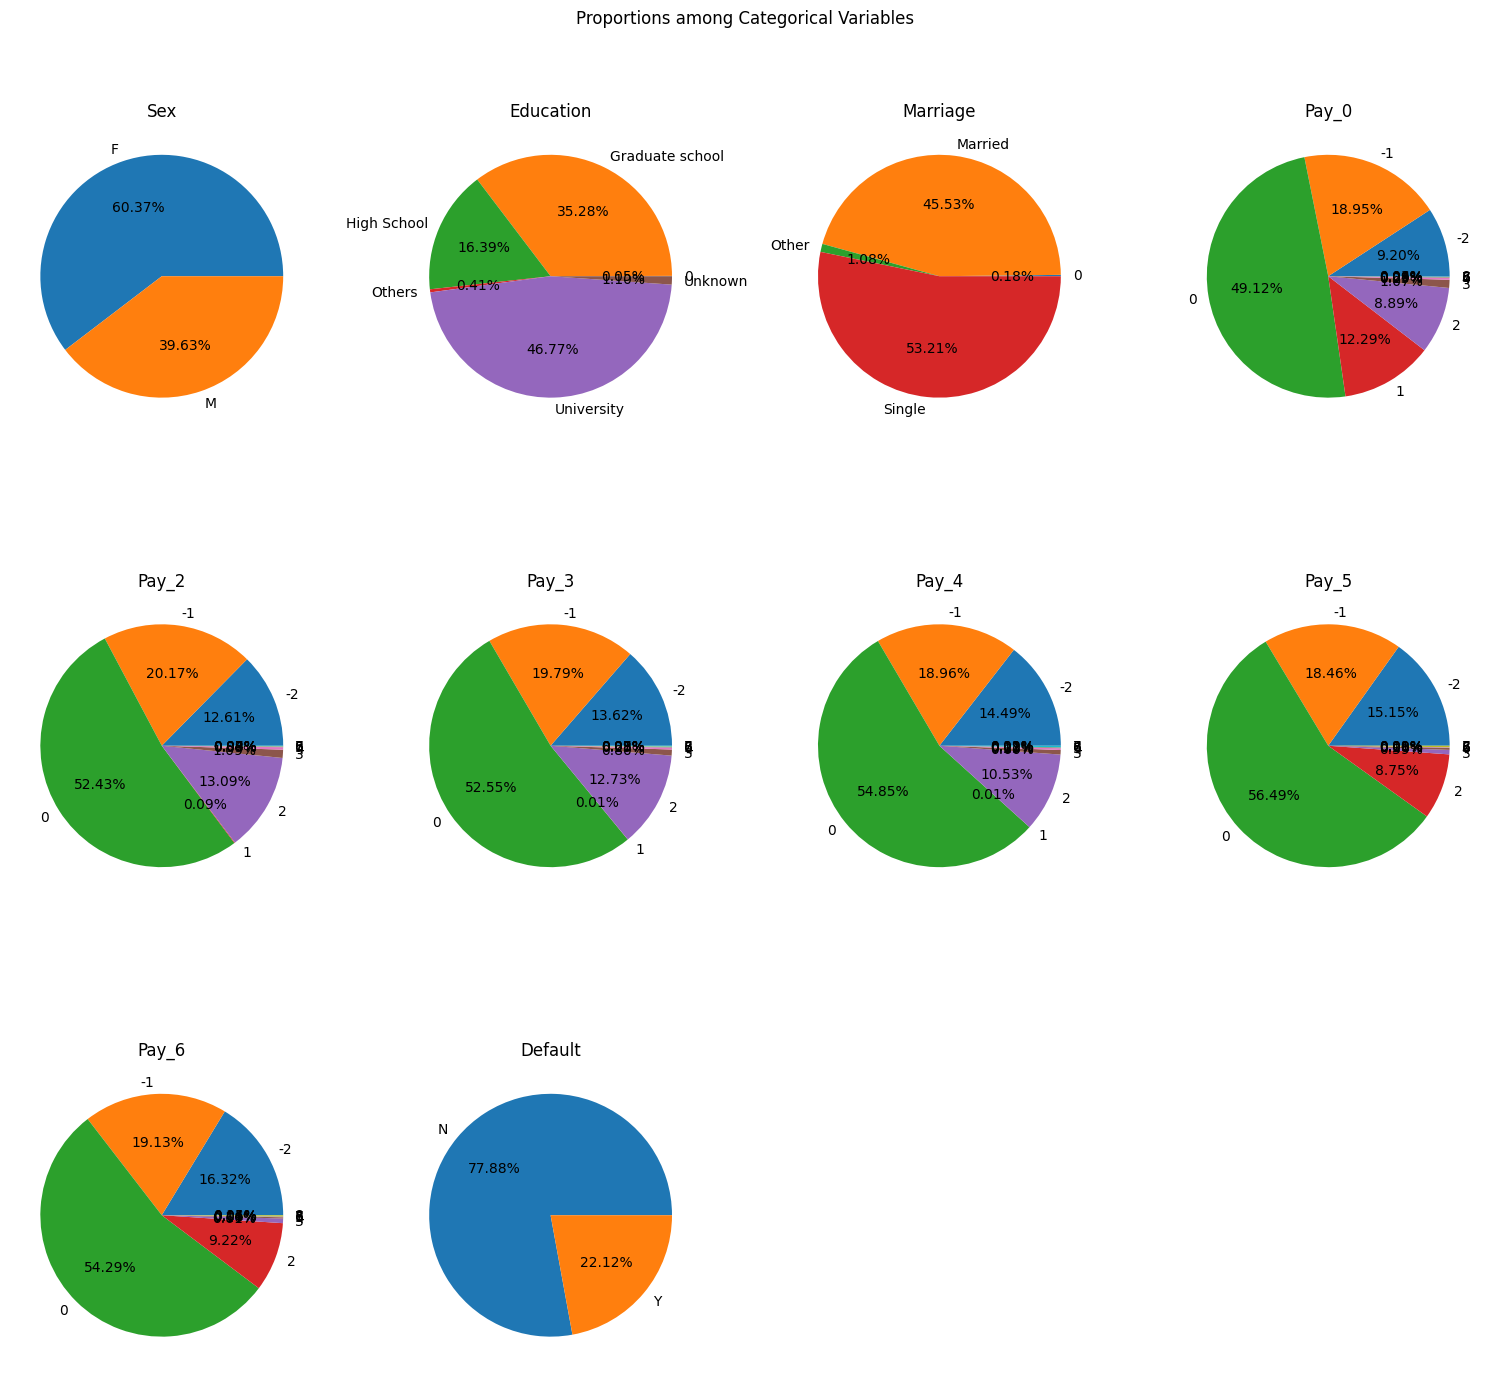

In [407]:
# Chart - 6 visualization code

fig, axes= plt.subplots(3, 4, figsize= (15, 15))
axes= axes.flatten()

for i, col in enumerate(categorical_cols):
    pie_df= df.groupby(col).size().reset_index().rename(columns= {0: "size"})
    axes[i].pie(
        data= pie_df, labels= col, x= "size",
        autopct= "%.2f%%"
    )
    axes[i].set_title(col.title())
    
for i in range(len(categorical_cols), 12):
    fig.delaxes(axes[i])

plt.suptitle("Proportions among Categorical Variables")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

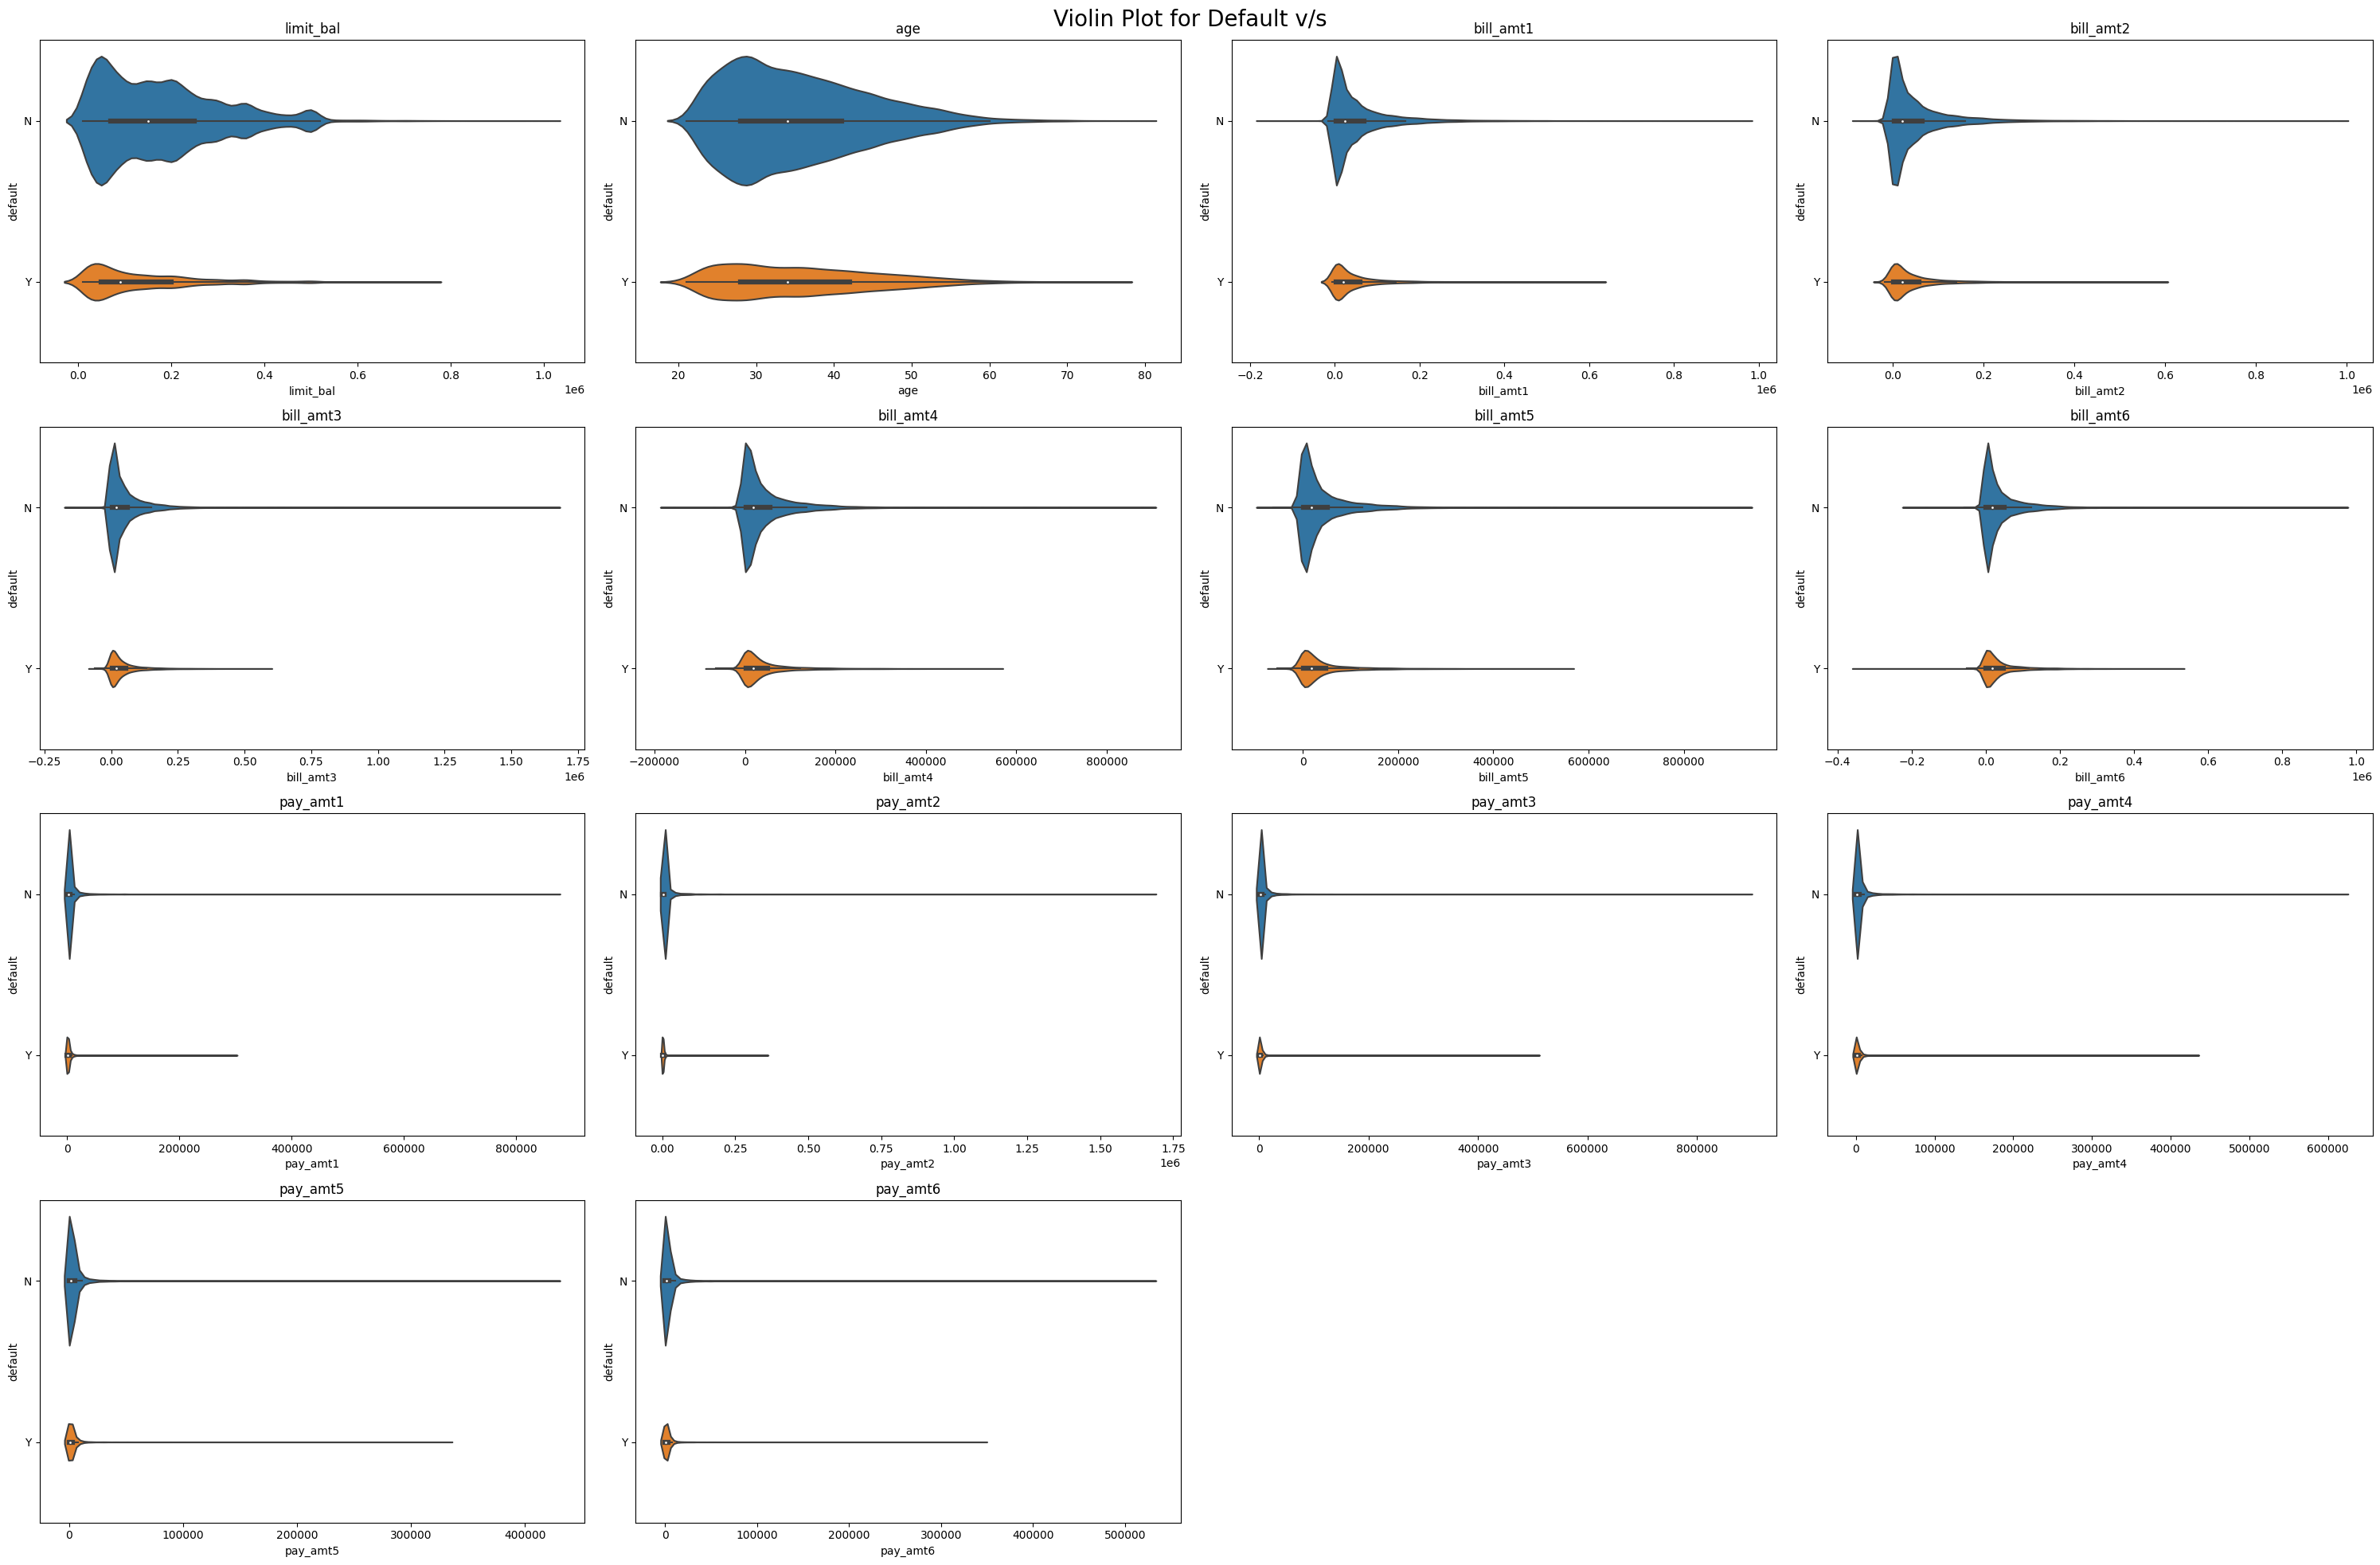

In [408]:
# Chart - 7 visualization code
#bivariate analysis

#violin plots

fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(
        data= df, 
        x= col, y= "default", scale= "count",
        ax= axes[i]
    )
    axes[i].set_title(col)
#     axes[i].set_ylabel("default", fontsize= 10)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])
    
plt.suptitle("Violin Plot for Default v/s", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

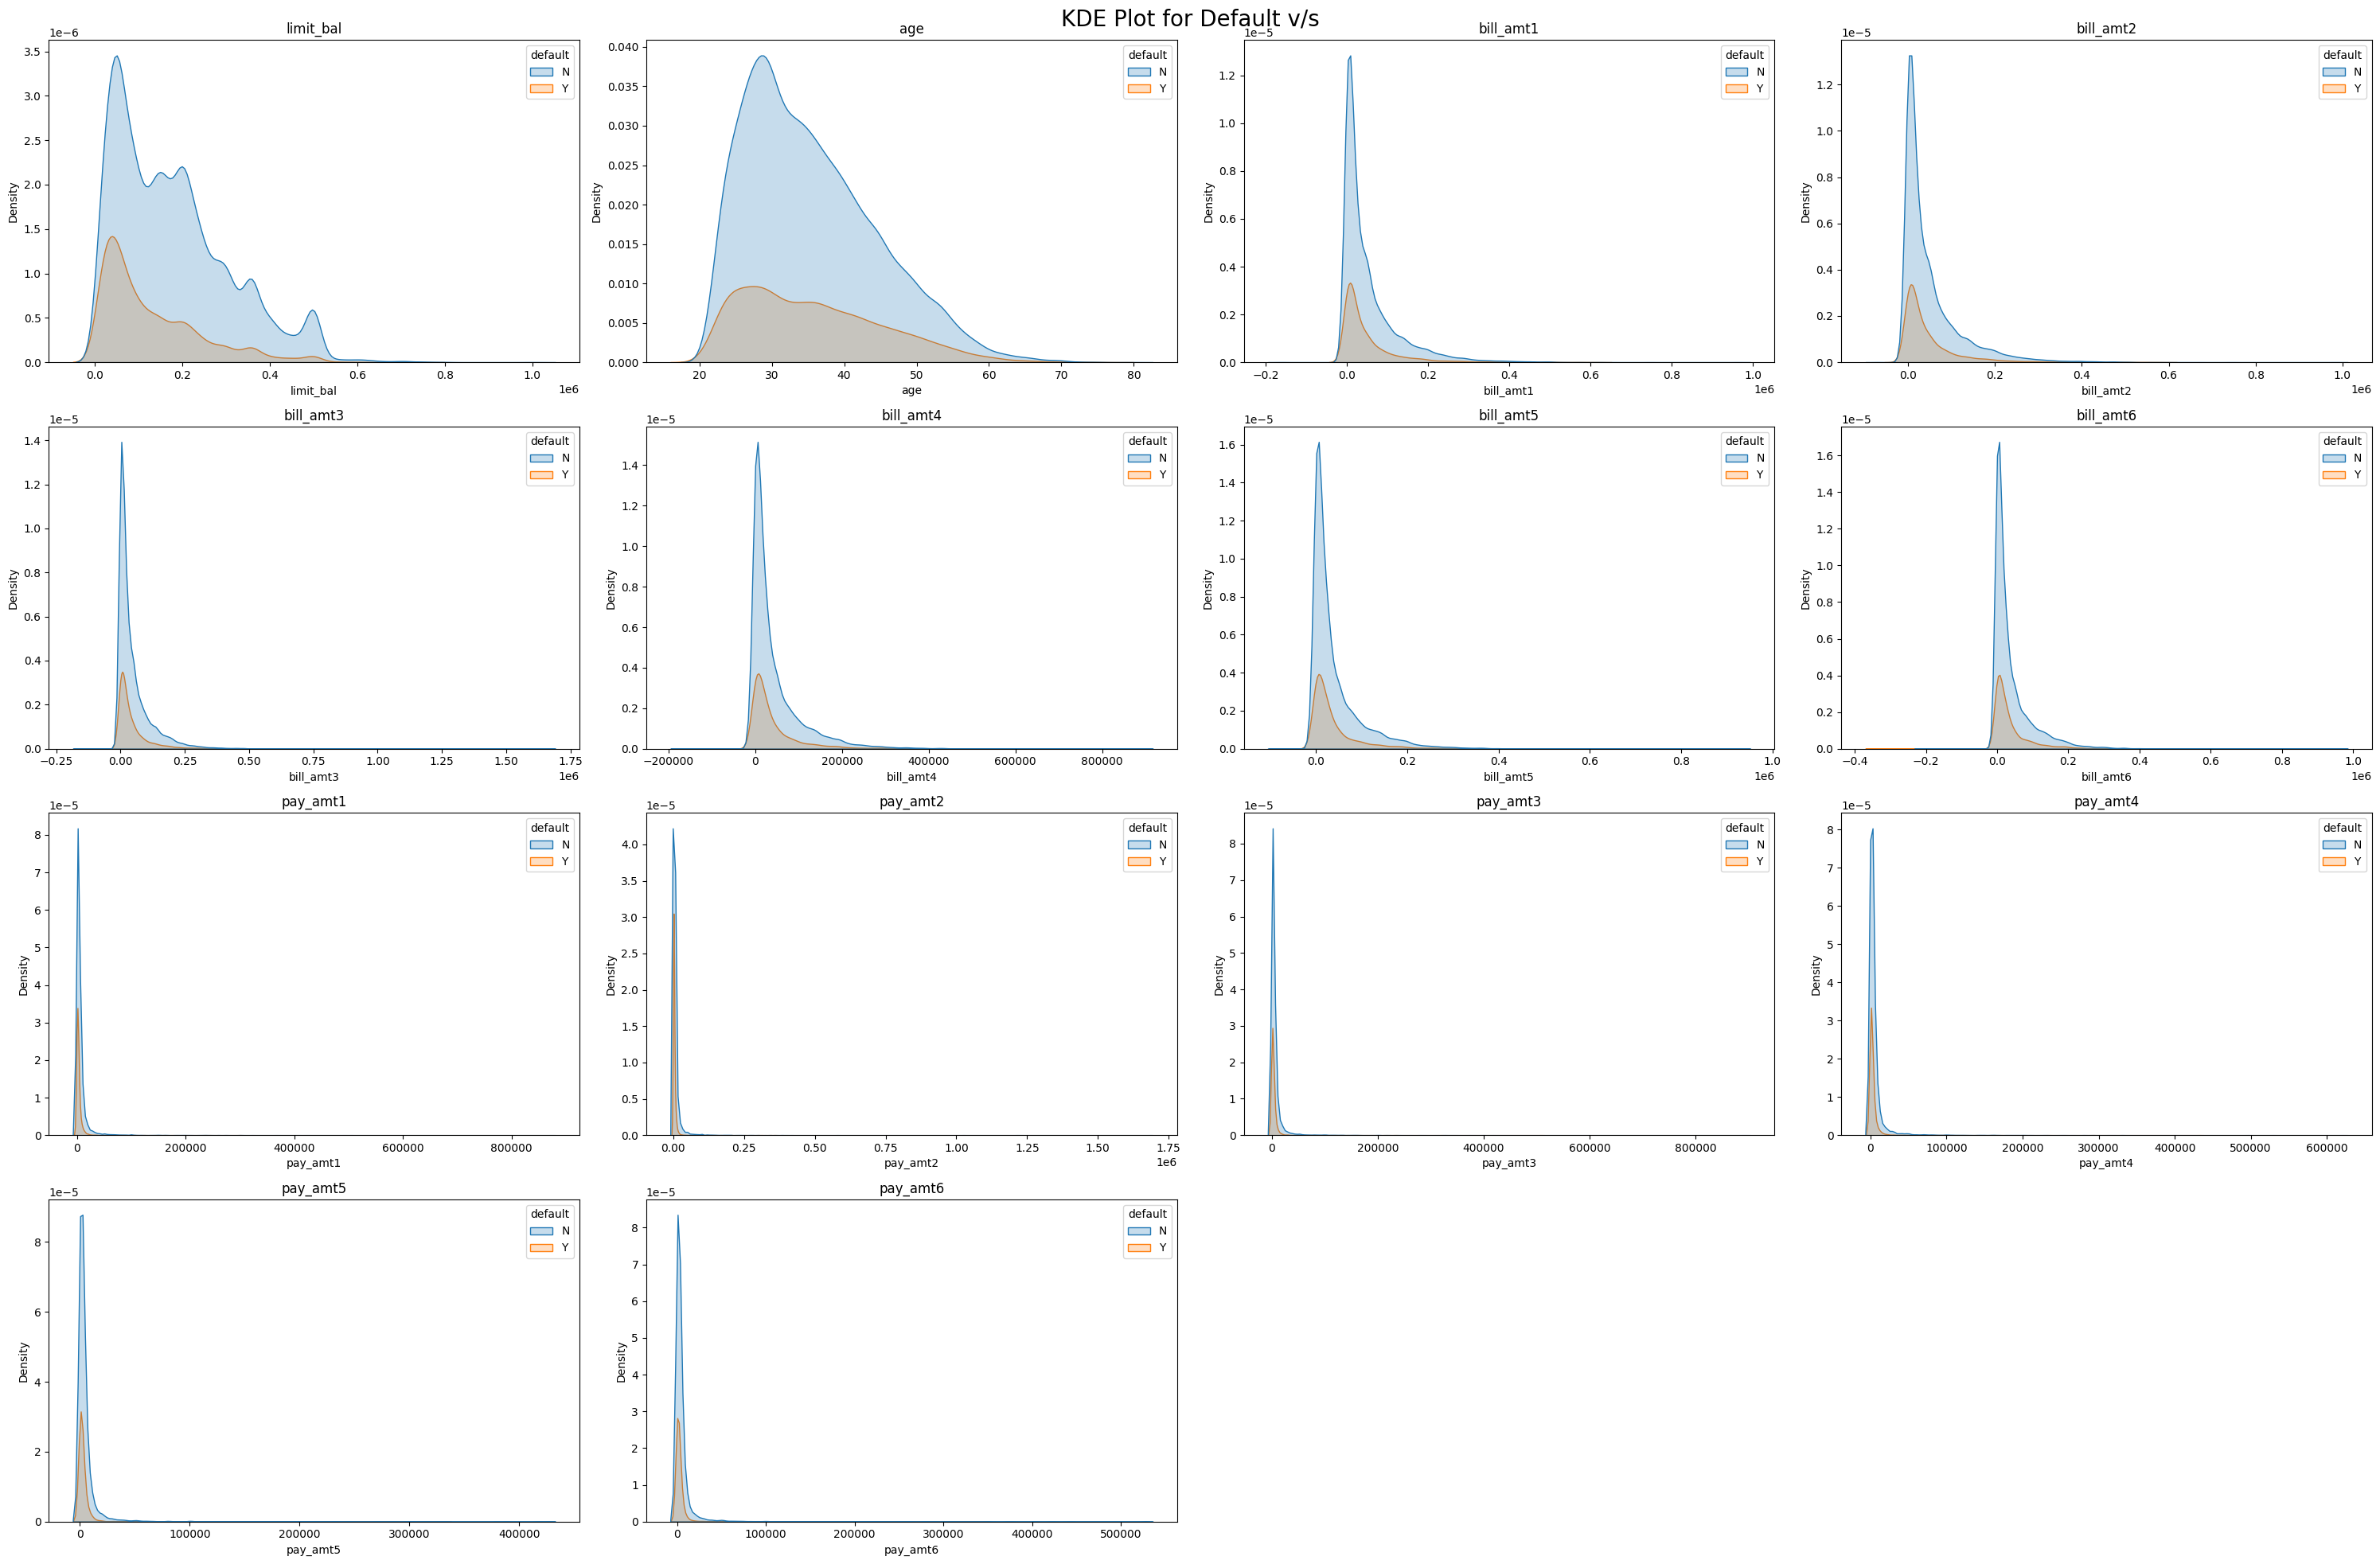

In [409]:
# Chart - 8 visualization code
#kde plot

fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data= df, x= col, hue= "default",
                fill= True, ax= axes[i])
    axes[i].set_title(col)
    
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])
    
plt.suptitle("KDE Plot for Default v/s", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

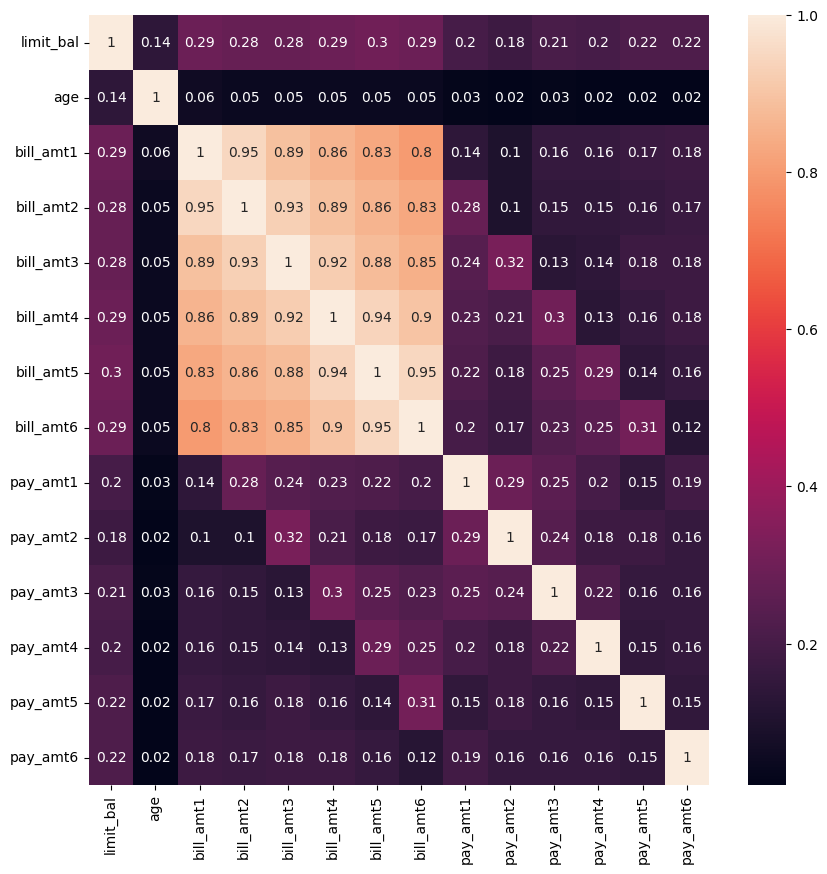

In [410]:
# Chart - 9 visualization code
#correlation heatmap

fig= plt.figure(figsize= (10, 10))
sns.heatmap(df[numerical_cols].corr().round(2), annot= True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/2087484501.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


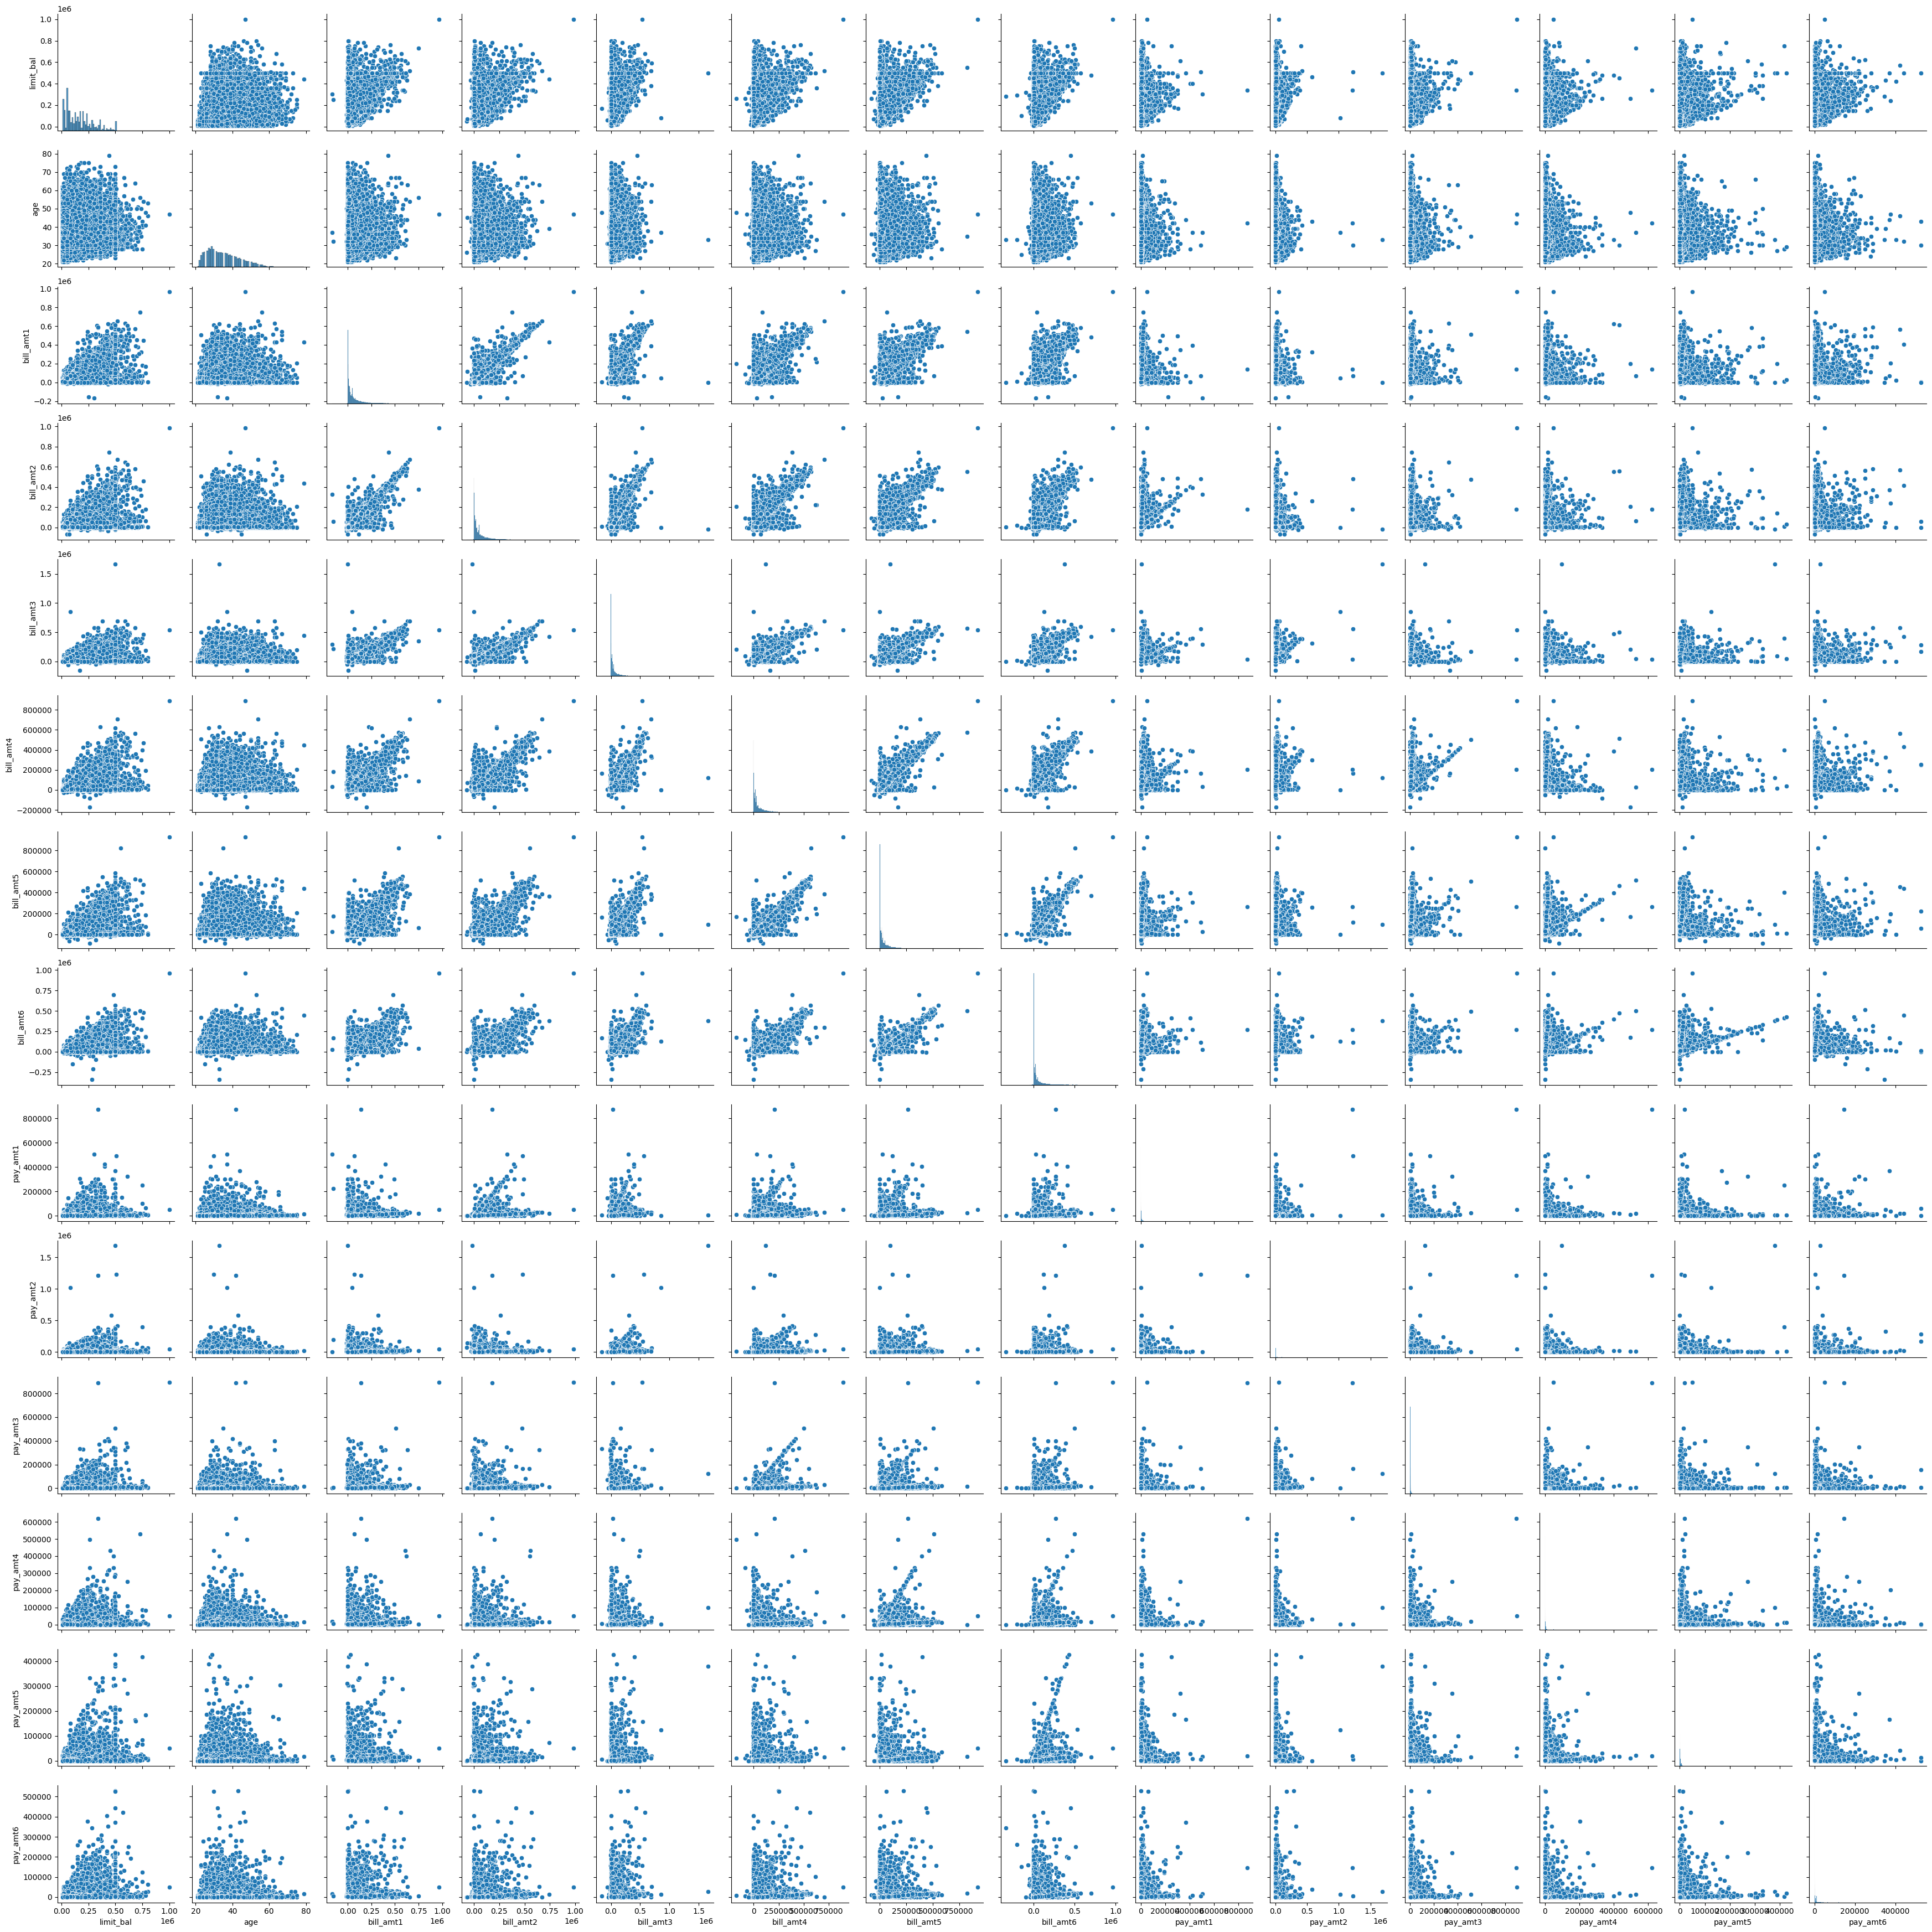

In [411]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [412]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [413]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [414]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [415]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [416]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [417]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [418]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [419]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [420]:
#spliting the dataset in dependent and target variable

X= df_model.drop(columns= ["default"])
y= df_model["default"]

### 1. Handling Missing Values

In [421]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers & Scaling Numerical Columns

In [422]:
# Handling Outliers & Outlier treatments
# all the numerical cols have outliers, so we'll use RobustScaler for outlier treatment and scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer, StandardScaler, MinMaxScaler, PowerTransformer)

In [423]:
def outlier_treatment(col):
    '''
    iqr based outlier treatment
    '''
    
    q1= np.percentile(col, 25, axis= 0)
    q3= np.percentile(col, 75, axis= 0)

    iqr= q3- q1
    
    lower_bound= q1- 1.5*iqr
    upper_bound=  q3+ 1.5*iqr
    
    return np.select(
        (col< lower_bound, col> upper_bound),
        (lower_bound, upper_bound),
        col
    )

In [424]:
num_cols_index= [i for i, feature in enumerate(X.columns) if feature in numerical_cols]
num_cols_index

[0, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [443]:
# with_centering= False, with_scaling= False, quantile_range= (0.5, 0.95), unit_variance= True
num_cols_preprocessing= Pipeline([
    (
        "scaling", 
        PowerTransformer()
    ),
    (
        "outlier treatment",
        FunctionTransformer(outlier_treatment)
    ),
])


In [444]:
X_num_scaled= num_cols_preprocessing.fit_transform(X[numerical_cols], y)
X_num_scaled_df= pd.DataFrame(X_num_scaled, columns= numerical_cols)
# X_num_scaled_df.columns= numerical_cols

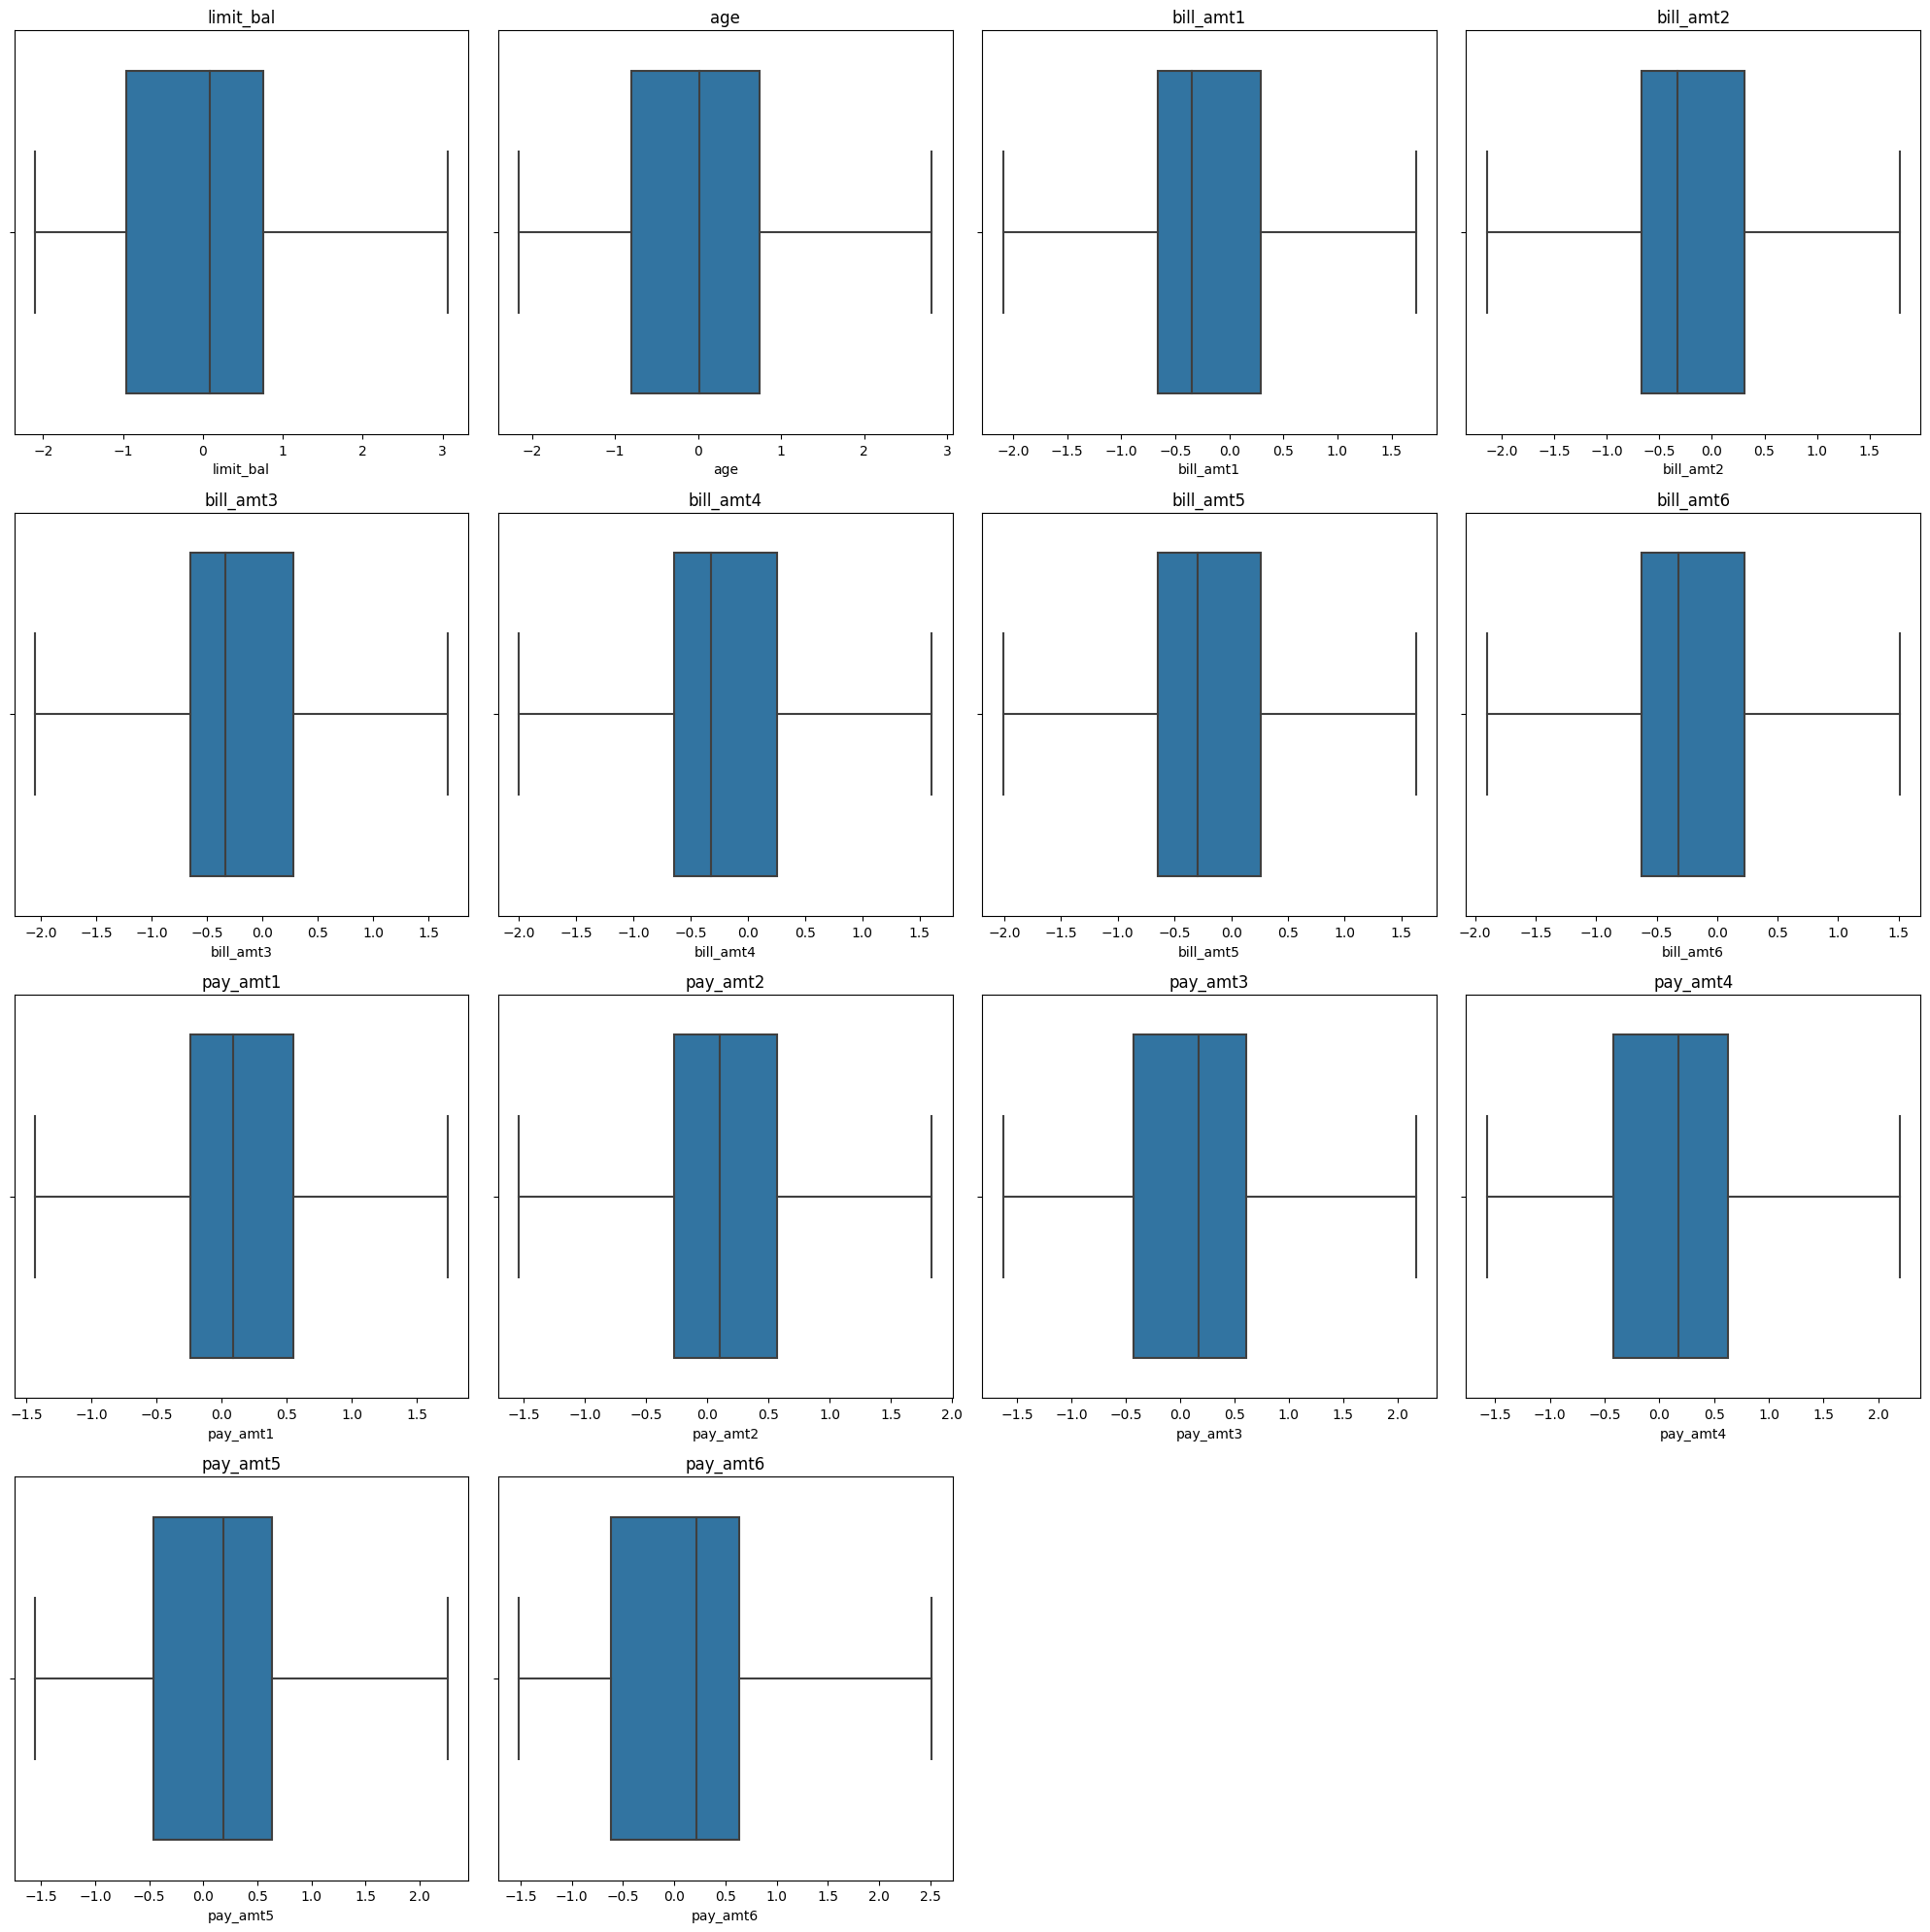

In [445]:
fig, axes= plt.subplots(4, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.boxplot(data= X_num_scaled_df, x= feature, ax= axes[i])
    axes[i].set_title(feature)

for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

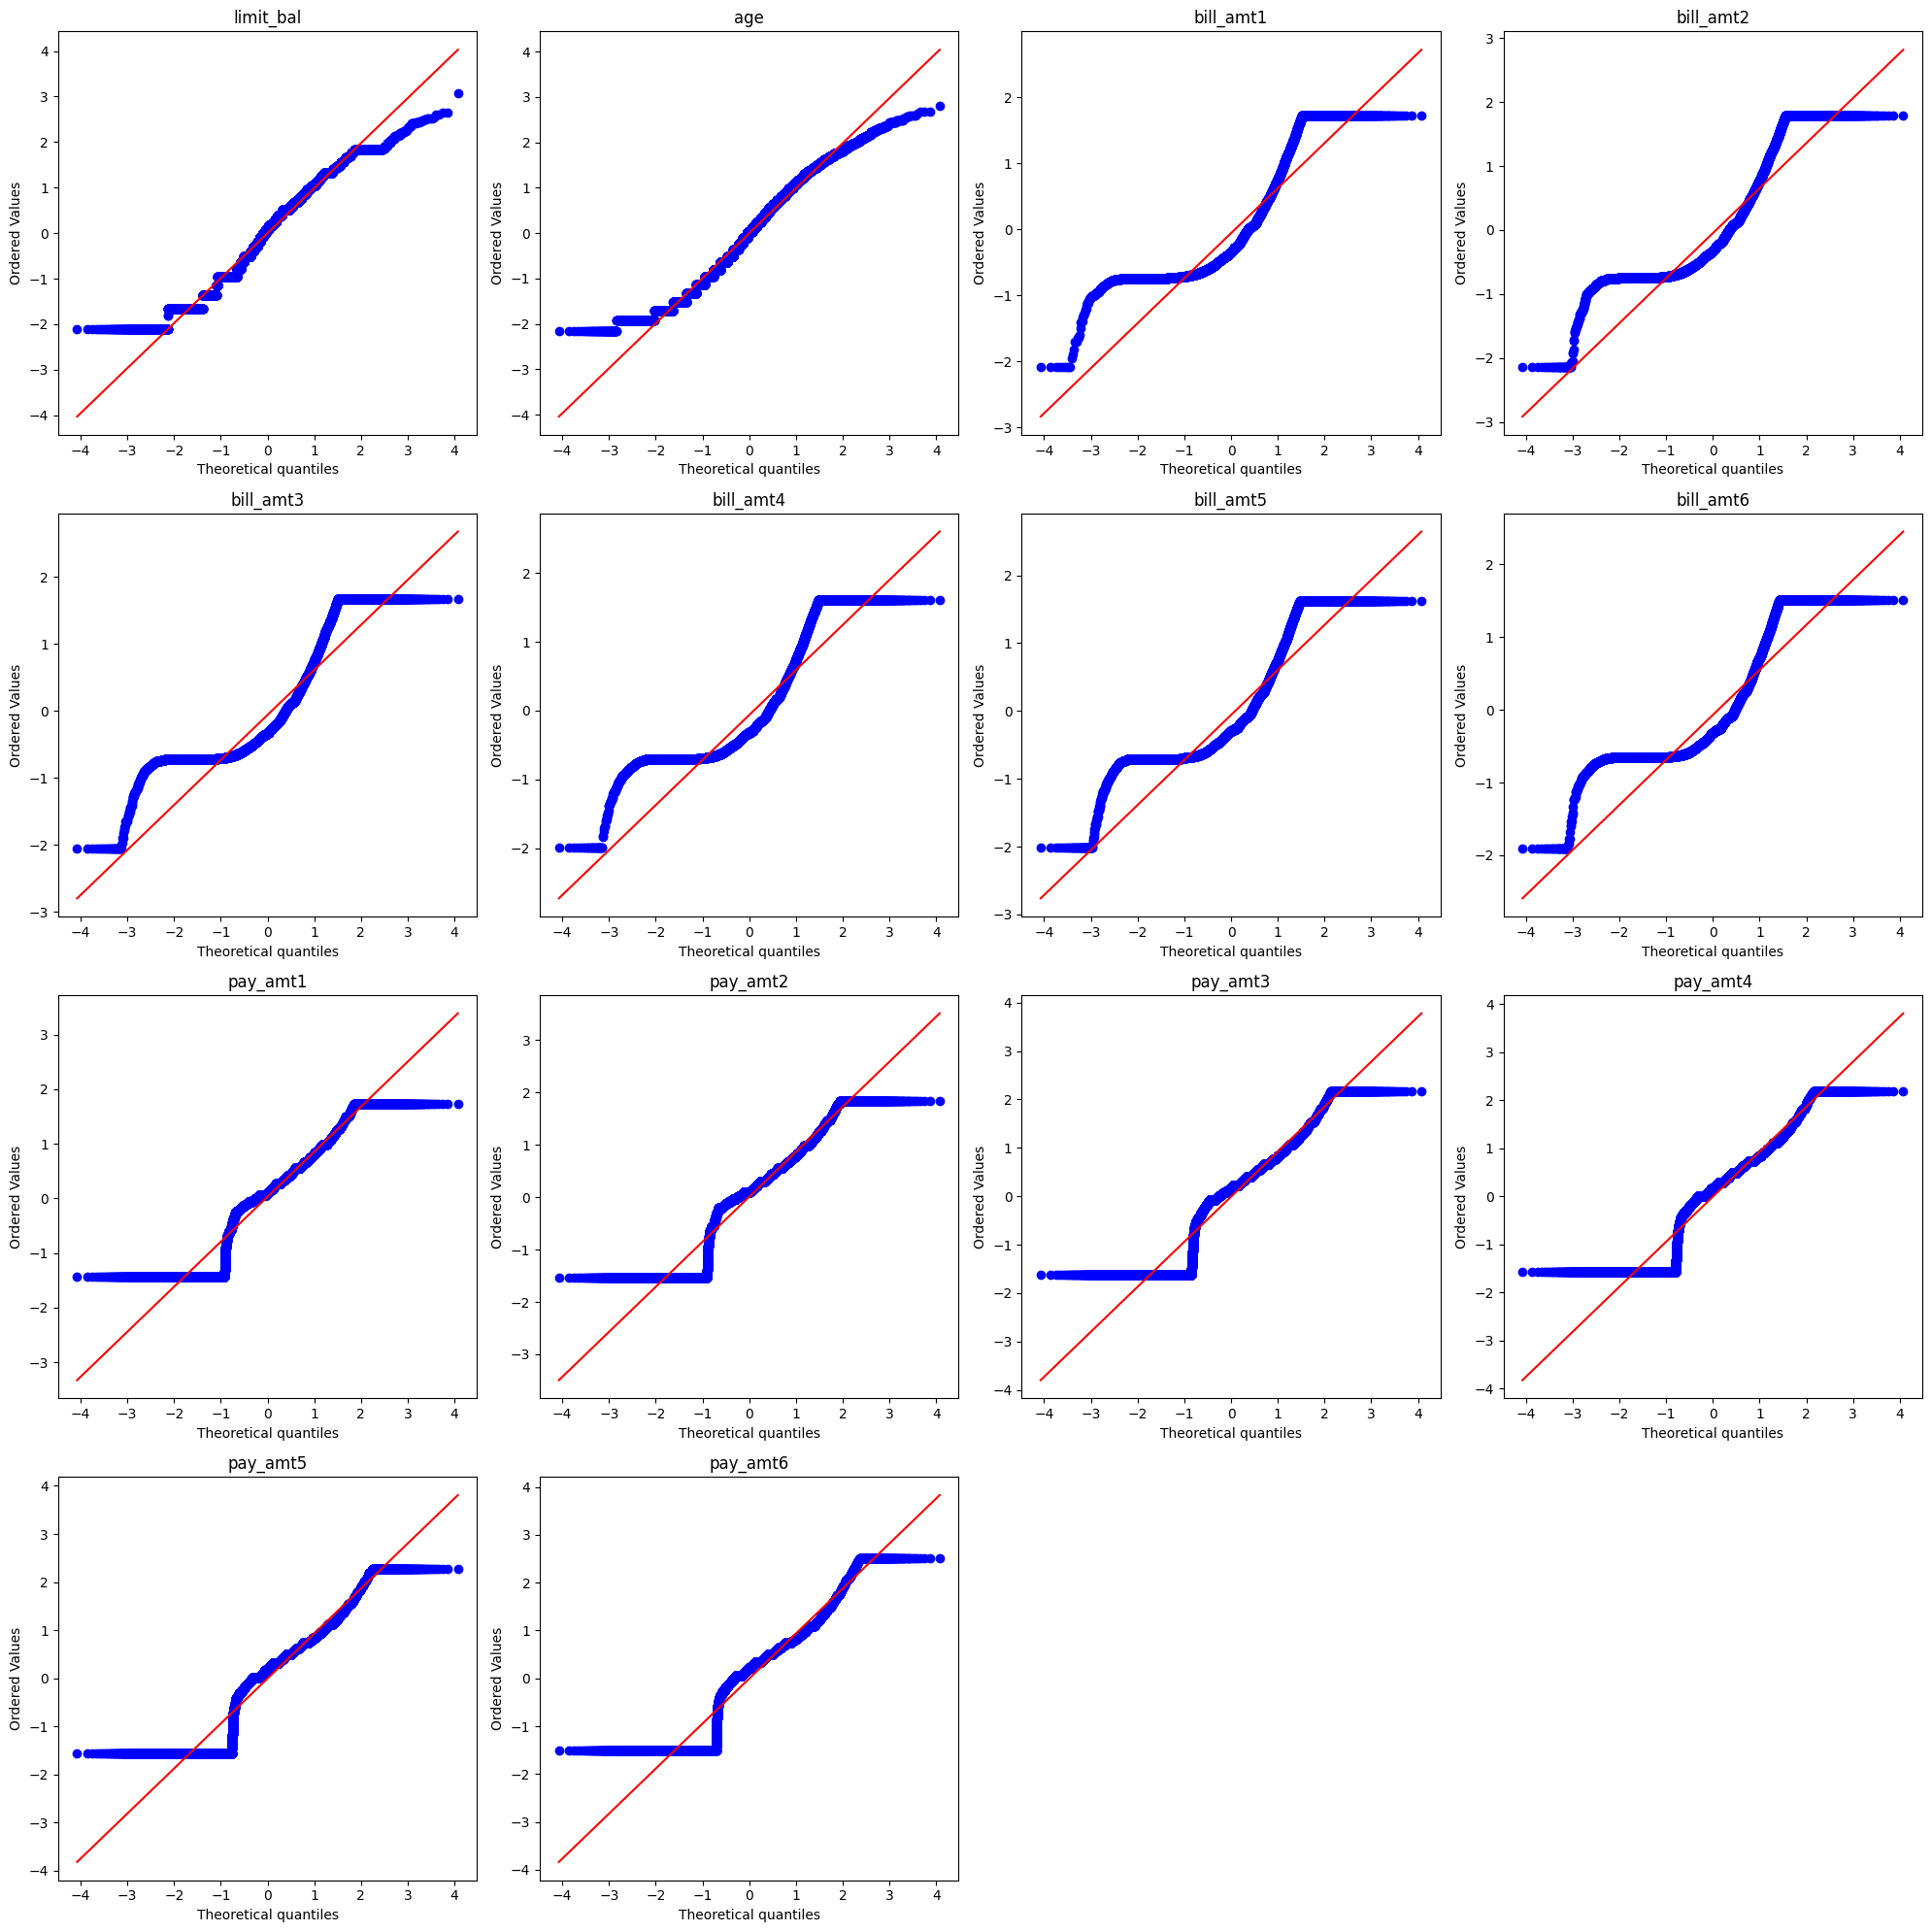

In [446]:
fig, axes= plt.subplots(4, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    probplot(X_num_scaled_df[feature], plot= axes[i])
    axes[i].set_title(feature)

for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [429]:
# Encode your categorical columns
#using OneHotEncoder to encode sex, education, marriage
#using LabelEncoder to encode default
#using SimpleImputer to impute "Unknown" values in marriage

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, OrdinalEncoder, LabelEncoder)
from sklearn.impute import SimpleImputer

In [450]:
cat_sex_pipeline= Pipeline([
    (
        "One Hot Encoding column 'sex'",
        OneHotEncoder(
            drop= "first"
        )
    )
])

cat_education_pipeline= Pipeline([
    (
        "imputing 'Unknown'",
        SimpleImputer(
            missing_values= "Unknown",
            strategy= "most_frequent"
        )
    ),
    (
        "Ordinal Encoding",
        OrdinalEncoder(
            categories= [["0", "Others", "High School", 
                         "Graduate school", "University"]]
        )
    )
])

cat_marriage_pipeline= Pipeline([
    (
        "imputing '0'",
        SimpleImputer(
            missing_values= "0",
            strategy= "most_frequent"
        )
    ),
    (
        "One Hot Encoding",
        OneHotEncoder(
            drop= "first"
        )
    )
])

cat_pay_pipeline= Pipeline([
    (
        "Ordinal Encoding columns 'pay_'",
        OrdinalEncoder(
            categories= [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]*6
        )
    )
])

In [451]:
cat_cols_preprocessing= ColumnTransformer([
    (
        "One Hot Encoding column 'sex'",
        cat_sex_pipeline,
        [1]
    ),
    (
        "imputing 'Unknown' with mode and Ordinal Encoding column 'education'",
        cat_education_pipeline,
        [2]
    ),
    (
        "imputing '0' with mode and One Hot Encoding column 'marriage'",
        cat_marriage_pipeline,
        [3]
    ),
    (
        "Ordinal Encoding 'pay_' columns",
        cat_pay_pipeline,
        slice(5, 11)
    )
])

In [452]:
categorical_features= categorical_cols.copy()
categorical_features.remove("default")

fig, axes= plt.subplots(4, 3, figsize= (30, 30))
axes= axes.flatten()

X_cat_processed= cat_cols_preprocessing.fit_transform(X, y)
X_cat_processed_df= pd.DataFrame(X_cat_processed, columns= ["sex", "education", "other", "single", "pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6"])

for i, feature in enumerate(X_cat_processed_df.columns):
    sns.countplot(data= X_cat_processed_df, x= feature, color= "#1f77b4", ax= axes[i])
    axes[i].set_title(feature)
    
for i in range(X_cat_processed_df.shape[1], 12):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [454]:
final_preprocessing= ColumnTransformer([
    (
        "Processing Numerical Columns",
        num_cols_preprocessing,
        num_cols_index
    ),
    (
        "One Hot Encoding column 'sex'",
        cat_sex_pipeline,
        [1]
    ),
    (
        "imputing 'Unknown' with mode and Ordinal Encoding column 'education'",
        cat_education_pipeline,
        [2]
    ),
    (
        "imputing '0' with mode and One Hot Encoding column 'marriage'",
        cat_marriage_pipeline,
        [3]
    ),
    (
        "Ordinal Encoding 'pay_' columns",
        cat_pay_pipeline,
        slice(5, 11)
    )
])

(30000, 24)

In [472]:
# Transform Your data
X_train_processed= final_preprocessing.fit_transform(X_train)
y_train_processed= LabelEncoder().fit_transform(y_train)

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [455]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [457]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, stratify= y, test_size= 0.30, random_state= 42)

In [458]:
X_train.head()

limit_bal sex        education marriage  age  pay_0  pay_2  pay_3  \
11018     160000   F       University   Single   32      0      0      0   
1710      100000   F  Graduate school   Single   30      0      0      0   
4618       80000   M  Graduate school   Single   29      0      0      0   
5482       20000   F       University  Married   27      0      0     -1   
26187      50000   F  Graduate school   Single   30     -2     -2     -2   

       pay_4  pay_5  ...  bill_amt3  bill_amt4  bill_amt5  bill_amt6  \
11018      0      0  ...     155404     153234     156731     155818   
1710       0      2  ...      42283      51539      50583      52588   
4618       0      0  ...      64277      45455      42231      42804   
5482      -1     -2  ...        780          0          0          0   
26187     -2     -2  ...          0          0          0          0   

       pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  
11018      6000      6000      5600      6000      6000      5500  
1710       5000     10000     10000         0      2846      1936  
4618       3300      2500      1556      1600      1600      1600  
5482       1006       780         0         0         0         0  
26187      2070         0         0         0         0         0  

[5 rows x 23 columns]

##### What data splitting ratio have you used and why? 

We've split the dataset into 70/30 train/test ratio because this ratio strikes a balance between having sufficient data for model training and having a reasonable amount of data for testing. Also by allocating 70% of the data for training, the model has access to a reasonably large training set, which can help reduce the risk of overfitting. While a 30% test set is often considered statistically significant, meaning that performance metrics (such as accuracy, precision, recall, etc.) estimated on this test set are likely to be representative of the model's performance on new, unseen data.

### 9. Handling Imbalanced Dataset

In [460]:
y.value_counts()

default
N    23364
Y     6636
Name: count, dtype: int64

In [462]:
len(y[y=="Y"])/len(y)

0.2212

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced, as only 22% of all the instances are 'Y', while the rest are'N'

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Rather than using Oversampling or Undersampling to treat the imbalance in the dataset, we'll penalize the models as we build them. The main reason for that being preservation of data integrity as by using class weighting, we can maintain the original distribution of the dataset. This is important when the class imbalance reflects the true distribution of the target variable in the real-world scenario we're modeling.

## ***7. ML Model Implementation***

In [463]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier

In [464]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "MLP Classifier": MLPClassifier(max_iter= 1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "Ridge Classifier": RidgeClassifier(),
}

In [468]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
meta_data_00 = []

for name, model in tqdm(models.items()):
    model_data = {}
    model_data["name"] = name
    model.random_state = 42
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Use an appropriate scoring metric for classification, e.g., "accuracy" or "f1_macro"
    scores = cross_val_score(
        model, X_train_processed, y_train_processed,
        cv=kfold, scoring="f1_macro", error_score='raise'
    )
    
    model_data["average f1 score"] = np.mean(scores)
    meta_data_00.append(model_data)

 86%|████████▌ | 12/14 [05:25<00:38, 19.39s/it]

In [ ]:
pd.DataFrame(meta_data_00)

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***